# Project Assignment B - Explainer Notebook
### 02805 Social graphs and interactions

s164519, Julie Fischer Vinther Christensen, <br>
s144549, Katja Steen Salskov-Iversen, <br>
s153631, Mie Frederiksen

***

> Essential imports for this notebook:

In [36]:
# ALL IMPORTS 
import networkx as nx
import pandas as pd
import numpy as np
import pickle
import operator
from operator import itemgetter
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D 
import seaborn as sns
from fa2 import ForceAtlas2
import io
import re
import nltk, re, pprint
from nltk import word_tokenize
import collections
from collections import Counter
import math
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import copy
from collections import defaultdict
import community
import random
import matplotlib.colors as mcolors
from IPython.display import IFrame
import seaborn as sns
sns.set()

# The force atlas algorithm parameters will obtain the visualization we like
forceatlas2 = ForceAtlas2(
                          # Behavior alternatives
                          outboundAttractionDistribution=True,  # Dissuade hubs
                          linLogMode=False,  # NOT IMPLEMENTED
                          adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                          edgeWeightInfluence=1.0,

                          # Performance
                          jitterTolerance=1.0,  # Tolerance
                          barnesHutOptimize=True,
                          barnesHutTheta=1.2,
                          multiThreaded=False,  # NOT IMPLEMENTED

                          # Tuning
                          scalingRatio=1.0,
                          strongGravityMode=False,
                          gravity=1.0,

                          # Log
                          verbose=True)

# Load the dataframes
df_a = pickle.load(open('df_athletes.txt','rb'))
df_c = pickle.load(open('df_countries.txt','rb'))
df_e = pickle.load(open('df_events.txt','rb'))

# Load the Network
G = pickle.load(open('G.txt','rb'))

# Load colors
cnames = pickle.load(open('cnames.txt','rb'))

# Table of content:
1. [Motivation](#part1)
2. [Basic stats. Let's understand the dataset better](#part2)
3. [Tools, theory and analysis](#part3)
4. [Discussion. Think critically about your creation](#part4)
5. [Contributions. Who did what?](#part5)

<hr style="border:0.5px solid gray"> </hr>

# 1. Motivation <a class="anchor" id="part1"></a>
This chapther will elaborate on the topic *Investigation of Olympic champions*. This is done by presenting and motivating the chosen datasets. Further, explaining the goals of the end-user experience. The Motivation chapther will be devided into the following sections:
* What is your dataset?
* Why did you choose this/these particular dataset(s)?
* What was your goal for the end user's experience?

#### 1.1 Introduction

The Legend says that it was Heracles the son of Zeus and the mortal woman Alcmene, that founded the Olympic Games. The Olympic games have traditionally been held with an increment of fourth years also known as Olympiads [[ref: History of Olympic Games]](https://www.history.com/topics/sports/olympic-games). Long story short the Olympics have been there for centuries growing every fourth year adding more athletes, events and countries. Every fourth year the champions are admired and celebrated around the world. Who are these champions? Where do they come from? How are they connected? What has the champions in common? These questions will be investigated in the analysis.  

<hr style="border:0.5px solid gray"> </hr>

# 2. Basic stats. Let's understand the dataset better <a class="anchor" id="part2"></a>

In this section the dataset is explained, how is the data gathered, and what is done to improve the dataset.

In this section, we will look into the datasets and the createD network. 

* 2.1 Presentation of the datasets
* 2.2 Description of the data cleaning and data scraping processes.
* 2.3 Basics stats analysis of the network.
* 2.4 The Network visualization

## 2.1 Getting the data
Data for the 2016 Olympics in Rio de Janeiro is used for this project. The data is downloaded from Kaggle (https://www.kaggle.com/rio2016/olympic-games) and consists 3 different datasets with information about athletes, medals, and events from summer games. Below is the 3 data sets shortly presented:

Events:
* Size: 20.95 KB
* Rows: 306 events 
* Columns: id, Sport, Discipline, Event Name, Gender of competitors and venue(s).

Contries:
* Size: 7.45 KB
* Rows: 201 contries
* Columns: Country code, population and gdp per capita

Athletes: 
* Size: 747.04 KB
* Rows: 11,538 athletes 
* Columns: Name, nationality, gender, age, height, weight, sport, and quantity of gold, silver, and/or bronze medals.

## 2.2 Data Cleaning and data scraping
The main goal for data cleaning is to create a column with the wikilink for the responsible Wikipedia webpage. With the wikilink all the text from the Wikipedia page can be downloaded as a .json file. 

The next 3 subsections will present how the data is cleaned to find the wikilinks for Events, Countries, and Athletes.

### Events
The 306 different events are grouped by the sport column. This reduces the dataframe to 31 different sports. For creating a column with the correct wikilink the text in the column 'sport' is combined with the text *'_at_the_2016_Summer_Olympics'.*  After the cleaning the event dataframe the dataframe consists of 31 rows (31 different sports).

In [2]:
df_e.head()

id                  sport             discipline  \
0   701492               swimming             backstroke   
12  772359                 diving                 diving   
42  492931  synchronised swimming  synchronised swimming   
44  183313             water polo             water polo   
46  177885                archery                archery   

                       name     sex  \
0   Women's 100m Backstroke  female   
12     Women's 10m Platform  female   
42                    Duets  female   
44                    Women  female   
46       Women's Individual  female   

                                               venues  \
0                            Olympic Aquatics Stadium   
12                         Maria Lenk Aquatics Centre   
42                         Maria Lenk Aquatics Centre   
44  Maria Lenk Aquatics Centre, Olympic Aquatics S...   
46                                        SambÌ_dromo   

                                             WikiLink  
0                swimming_at_the_2016_Summer_Olympics  
12                 diving_at_the_2016_Summer_Olympics  
42  synchronized_swimming_at_the_2016_Summer_Olympics  
44             water_polo_at_the_2016_Summer_Olympics  
46                archery_at_the_2016_Summer_Olympics

**The Wikipedia page for an event:**

In [37]:
IFrame("https://en.wikipedia.org/wiki/Sailing_at_the_2016_Summer_Olympics", width = 1000, height = 400)

### Counties:
For creating a column with the correct wikilink the text in the column 'country' is combined with the text *'_at_the_2016_Summer_Olympics'.* All NaN values are removed. After the data cleaning, the counties dataframe consist of 173 rows (173 different countries)

In [4]:
df_c.head()

country code population       gdp_per_capita  \
0          Afghanistan  AFG   32526562  594.323.081.219.966   
1              Albania  ALB    2889167  394.521.758.150.914   
2              Algeria  ALG   39666519  420.603.123.244.958   
5               Angola  ANG   25021974  410.147.215.182.964   
6  Antigua and Barbuda  ANT      91818  137.147.319.616.988   

                                          WikiLink             country2  
0          Afghanistan_at_the_2016_Summer_Olympics          Afghanistan  
1              Albania_at_the_2016_Summer_Olympics              Albania  
2              Algeria_at_the_2016_Summer_Olympics              Algeria  
5               Angola_at_the_2016_Summer_Olympics               Angola  
6  Antigua_and_Barbuda_at_the_2016_Summer_Olympics  Antigua_and_Barbuda

**The Wikipedia page for a country:**

In [38]:
IFrame("https://en.wikipedia.org/wiki/Denmark_at_the_2016_Summer_Olympics", width = 1000, height = 400)

### Athelets:
The Wikilink column for the Athletes is a bit more complicated to create. Due to the Wikipedia pages for the Athletes is independent of the 2016 Summer Olympics and the column with names from the downloaded Kaggle data is not necessarily the same as the athlete's name on Wikipedia. For example, the athlete *Aaron Brown*'s Wikipedia page name is *Aaron_Brown_(sprinter)*.
To find the right wikilinks for Athletes, the downloaded Wikipedia pages for every country are used. Every country Wikipedia page has an overview of the country athletes participating in the 2016 Summer Olympics. From this overview, all the correct wikilinks can be found and subsequently be matched with the dataframe. All the Athlete Wikipedia pages can be downloaded with this wikilink if the Athlete has a  Wikipedia page.

Another problem is that some Wikipedia pages are automatically redirected to another page. For example, the wikilink for the athlete *Rebecca Downie* is redirected to the wikilink *Becky_Downie*. This is handled by finding all downloaded Wikipedia pages that consist of the text *'#REDIRECT'* and download the correct Wikipedia page.

All NaN values are removed. After the cleaning, the Athletes dataframe consist of 5.319 rows (5319 different Athletes).

In [6]:
df_a.head()

id           name nationality   sex       dob height weight  \
0  435962603    Aaron Brown         CAN  male   5/27/92   1.98     79   
3  521041435     Aaron Cook         MDA  male    1/2/91   1.83     80   
6   33922579     Aaron Gate         NZL  male  11/26/90   1.81     71   
7  173071782    Aaron Royle         AUS  male   1/26/90    1.8     67   
8  266237702  Aaron Russell         USA  male    6/4/93   2.05     98   

        sport gold silver bronze          name2                WikiLink  
0   athletics    0      0      1    Aaron_Brown  Aaron_Brown_(sprinter)  
3   taekwondo    0      0      0     Aaron_Cook  Aaron_Cook_(taekwondo)  
6     cycling    0      0      0     Aaron_Gate              Aaron_Gate  
7   triathlon    0      0      0    Aaron_Royle             Aaron_Royle  
8  volleyball    0      0      1  Aaron_Russell           Aaron_Russell

**The Wikipedia page for an Athelete:**

In [39]:
IFrame("https://en.wikipedia.org/wiki/Katja_Salskov-Iversen", width = 1000, height = 400)

## 2.3 Understanding the Network

By having the 3 dataframes and all the downloaded Wikipedia pages for sports, Countries, and Athletes. The Network graph can be created. Every sport, country, and athlete in the 3 cleaned dataframes are nodes in the graph. The edges in the graph are the wikilinks linking one Wikipedia page to another Wikipedia page. The edges are found by finding all wikilinks on each Wikipedia page. If the wikilink links a sport, a country, or an athlete in the 3 dataframes, the wikilink will be added as an edge in the graph. Finally, if the nodes in the graph have degree 0 the node is removed from the graph.

### Size of the network

In [2]:
print(f"The number of nodes in the network: {G.number_of_nodes()}")
print(f"The number of links in the network: {G.number_of_edges()}")

The number of nodes in the network: 5463
The number of links in the network: 16306


The 3 original dataframes had 31 sports, 201 countries, and 11.538 athletes which means that a fully Olympic network should have 11.770 nodes. But due to the data cleaning and the fact that not every athlete has a Wikipedia page. The Network is reduced to 5.463 nodes with 16.306 links. This is still a great network that is highly connected.

### Links connecting the different node types
Nodetype represents if the node is a sport, country, or athlete. 

In [9]:
# Find nodetype by the nodes attribute:
Nodetype = nx.get_node_attributes(G,'nodetype')

# Counter
NodetypeLink_count = 0

# Check if there is a link between different nodetypes:
for edge in G.edges:
    if(Nodetype[edge[0]] != Nodetype[edge[1]]):
        NodetypeLink_count  += 1
# Print
print("\n There are " + str(NodetypeLink_count) + " links between the different nodetypes in the network.")        


 There are 9018 links between the different nodetypes in the network.


That means that in 9018 times a node links to another node from a different node type. This indicates that the node types are strongly connected. Due to half of all links in the network links betweens different node types.

### Top most connected nodes

In [10]:
#Find in and out degrees for the network
in_degs = sorted([[G.in_degree(node), node] for node in G.nodes], reverse=True)
out_degs = sorted([[G.out_degree(node), node] for node in G.nodes], reverse=True)

# Pandas dataframe to display
in_degs = pd.DataFrame(in_degs[:5], columns=["In degree", "Node"], index=[i for i in range(1,6)])
out_degs = pd.DataFrame(out_degs[:5], columns=["Out degree", "Node"], index=[i for i in range(1,6)])

# Print:
print("\nTop 5 in degrees:")
display(in_degs)

print("\nTop 5 out degrees:")
display(out_degs)


Top 5 in degrees:


In degree             Node
1         59      Andy_Murray
2         54  Serena_Williams
3         53     Rafael_Nadal
4         48    Fabio_Fognini
5         47        Jack_Sock


Top 5 out degrees:


Out degree                                       Node
1         513  United_States_at_the_2016_Summer_Olympics
2         432        Germany_at_the_2016_Summer_Olympics
3         330          Japan_at_the_2016_Summer_Olympics
4         326  Great_Britain_at_the_2016_Summer_Olympics
5         323          Italy_at_the_2016_Summer_Olympics

In-degree top 5 is all tennis players. The out-degrees results are as expected. The countries have mostly outgoing links, due to each country links to all athletes competing for that country. This top 5 shows the countries with some of the large numbers of athletes competing. 

### In and out-degree distributions

To begin with, it is interesting to investigate a scatter plot of the in- and out degrees. 

#### Scatter plot of in- and out degree

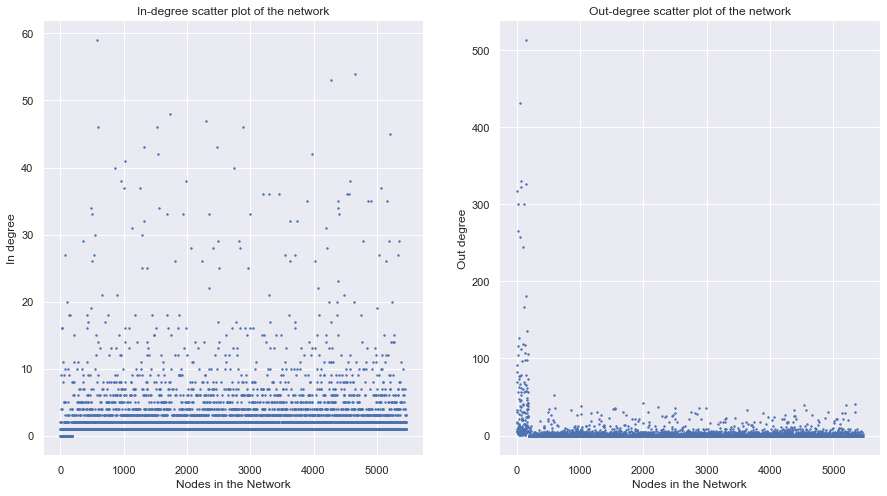

In [11]:
# A scatterplot to compare the in-degrees and the out-degrees
node_number = [i for i in range(len(G.nodes))]
nodes = [node for node in G.nodes]

in_degrees = [G.in_degree(node) for node in G.nodes]
out_degrees = [G.out_degree(node) for node in G.nodes]

# Function
def scatter_plots():
    fig, axs = plt.subplots(1, 2,figsize=(15,8))
    
    axs[0].scatter(node_number, in_degrees, s=2)
    axs[0].set_xlabel('Nodes in the Network')
    axs[0].set_ylabel('In degree')
    axs[0].set_title('In-degree scatter plot of the network')
    axs[1].scatter(node_number, out_degrees, s=2) 
    axs[1].set_xlabel('Nodes in the Network')
    axs[1].set_ylabel('Out degree')
    axs[1].set_title('Out-degree scatter plot of the network')
    
    return axs

axs = scatter_plots()
plt.show()

The scatter plots above show all the network nodes and their respective in-degree and out-degree. The plots show a clear difference in the distribution. The In-degree has generally a lower number of degrees and is more randomly scattered. The out-degrees have few nodes with a large degree. Next, the outliers in this scatter plot are detected to determine who these outliers are.

#### Outlier detection

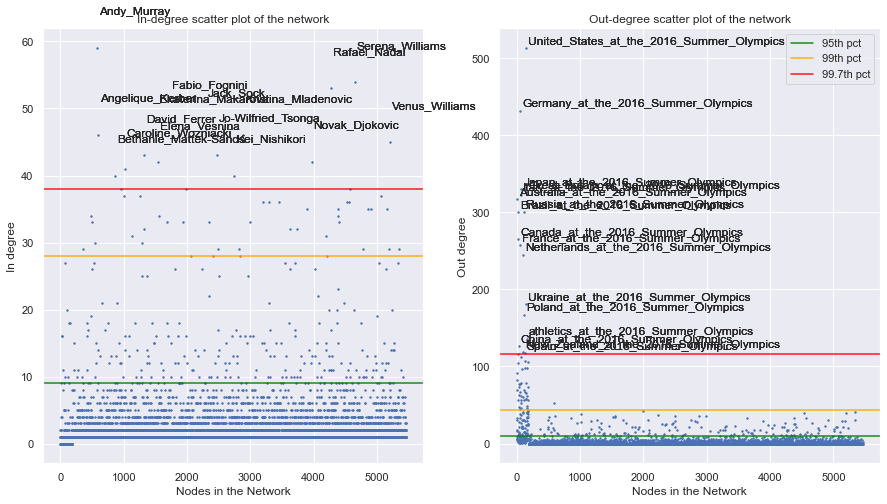

In [12]:
# The high percentiles to explore and give the percentiles a color
percentiles = [95, 99, 99.7] 
color = ["green", "orange", "red"] 

axs = scatter_plots()

# Adding the persent
for i in range(len(percentiles)):
    axs[0].axhline(y=np.percentile(in_degrees, percentiles[i]), c=color[i], xmin=0, xmax=1, alpha=0.9, label=str(percentiles[i])+"th pct")
    axs[1].axhline(y=np.percentile(out_degrees, percentiles[i]), c=color[i], xmin=0, xmax=1, alpha=0.9, label=str(percentiles[i])+"th pct")

    # Add top in-degree labels
    for n in range(len(in_degrees)):
        if in_degrees[n] > np.percentile(in_degrees, 99.7):
            axs[0].text(n+30, in_degrees[n]+5, nodes[n])
   
    # Add top out-degree labels
    for n in range(len(out_degrees)):
        if out_degrees[n] > np.percentile(out_degrees, 99.7):
            axs[1].text(n+30, out_degrees[n]+5, nodes[n])
    
axs[1].legend()
plt.show()

The scatter plots above show where the high percentiles lie in the in-degree and out-degree distributions. The in-degree scatter plot shows that 95% of the nodes have less than 9 in degrees. Only 0,03% of the nodes have more than 38 in-degrees and these few nodes are all tennis players. For the out-degree, the few nodes that are above the 99,7 percentiles are mostly countries but also the sport *athletics*. The sport athletics has many participants and therefore many out-degrees. These two scatter plots shows that both the in- and out-degree has some extreem outliers that are far from the norm.

Next the in- and out-degrees will be investigated by a histogram and a loglog distribution. 

#### Histogram and loglog distributions

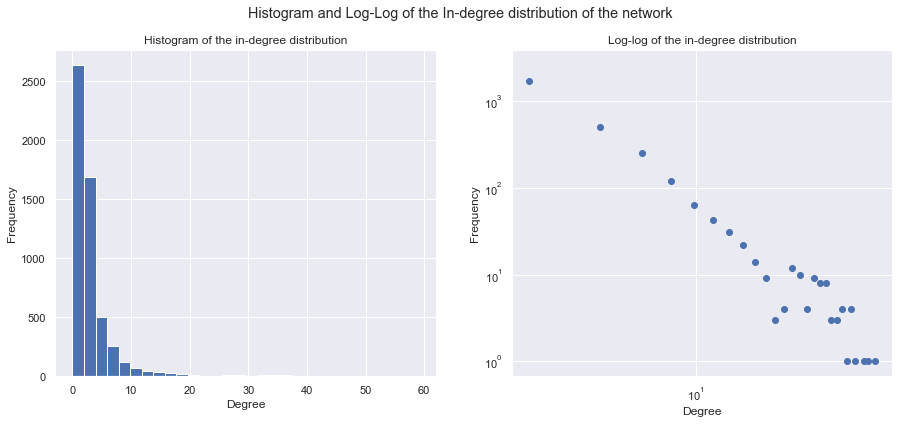

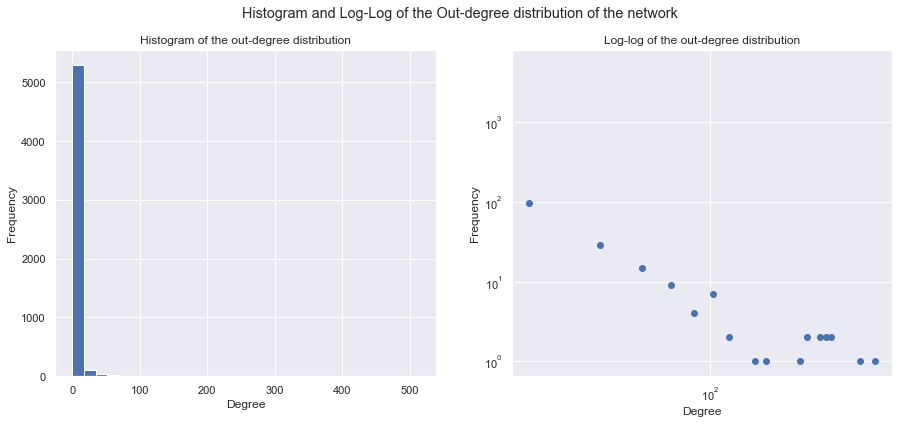

In [13]:
# Function
def Hist_LogLog_dist(G_deg, Print, title):
    degs = [deg for (node, deg) in G_deg]
    hist, bin_edges = np.histogram(degs, bins=30)
    degree_seq = sorted([d for n, d in G_deg], reverse=True)
    degreeCount = collections.Counter(degree_seq)
    deg, cnt = zip(*degreeCount.items())

    fig, axs = plt.subplots(1, 2,figsize=(15,6)) # Side-by-side comparison
    fig.suptitle(title)
    
    # Histogram plot
    axs[0].hist(degs, bin_edges) 
    axs[0].set(ylabel='Frequency', xlabel='Degree')
    axs[0].set_title('Histogram of the {} distribution'.format(Print)) 
    
    # Log-log plot
    axs[1].loglog(bin_edges[:-1], hist, 'bo', markersize=6) 
    axs[1].set_title('Log-log of the {} distribution'.format(Print))
    axs[1].set(ylabel='Frequency', xlabel='Degree');
    
    plt.show()
    
Hist_LogLog_dist(G.in_degree(),  "in-degree", "Histogram and Log-Log of the In-degree distribution of the network")
Hist_LogLog_dist(G.out_degree(), "out-degree", "Histogram and Log-Log of the Out-degree distribution of the network")

Because the outliers arent removed the histogram for especially the out-degrees are hard to investigate. For both the in- and the out-degree distribution most of the nodes have a very small degree in both the in and out.

It is instead interesting to investigate the log-log distribution because, when we have nodes with widely different degrees, a linear plot is unable to display them all. The log-log distribution shows that the Olympic network is a scale-free network and follows a power law. The degrees of the smallest and the largest nodes are widely different and spanning several orders of magnitude. In contrast, a random network has comparable degrees (REF:BOG).

## 2.4 Network Visualization 

The below plot shows the Olympic network with the 3 node types, sports (Blue), countries (red), and athletes (green). The size of the nodes depends on the node's degree. 

100%|██████████| 100/100 [00:15<00:00,  6.53it/s]


BarnesHut Approximation  took  2.16  seconds
Repulsion forces  took  12.76  seconds
Gravitational forces  took  0.04  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.17  seconds


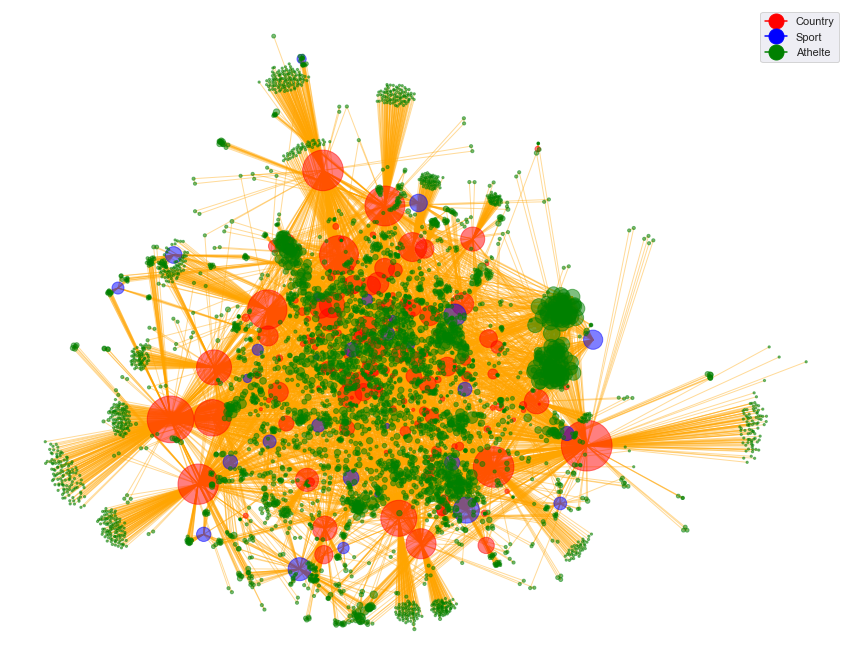

In [2]:
#Convert to an undirected graph
G = G.to_undirected()

# Node color:
node_color = []

# for each node in the graph
for node in G.nodes(data=True):
    # if the node has the attribute contries
    if 'countries' in node[1]['nodetype']:
        node_color.append('red')
    # if the node has the attribute events
    elif 'sports' in node[1]['nodetype']:
        node_color.append('blue')   
    # if the node has the attribute athelets
    else:
        node_color.append('green')
        
# Node-size
G_Degree = [G.degree(i)*5 for i in G.nodes()]

# custom legends
legend_elements = [Line2D([0], [0], marker='o', color='red', label='Country',
                           markersize=15),
                   Line2D([0], [0], marker='o', color='blue', label='Sport',
                           markersize=15),
                   Line2D([0], [0], marker='o', color='green', label='Athelte',
                           markersize=15)]
   

#Show the visualisation
plt.figure(figsize=(15,12))
positions = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=100)
nx.draw_networkx_nodes(G, positions, node_size = G_Degree, node_color = node_color,  alpha=0.5)
nx.draw_networkx_edges(G, positions, edge_color="orange",alpha=0.4)
plt.legend(handles=legend_elements,loc='upper right')
plt.axis('off')
plt.show()

The Olympic Network shows that the country's nodes are the largest nodes due to that large number of out degrees. Further, a lot of the athletes are only connected to a country node. 

<hr style="border:0.5px solid gray"> </hr>

# 3. Tools, theory and analysis. <a class="anchor" id="part3"></a>

In this section, we will look into the Olympic Network. 

* 3.1 Analysing the Olympic Network 
    * 3.1.1 Analysis of communities in the Olympic Network
* 3.2 Analysis of sub network that only consist Athletes
    * 3.2.1 Analysis of communities in the athletes network
    * 3.2.2 Sentiment analysis athletes network
* 3.3 Analysis of medalists 


## 3.1  Analysis of the Olympic Network

### 3.1.1 Communities in the Olympic Network
Now lets investigate the communities of the athletes. 
A community is a locally dense connected subgraph in a network. This expectation relies on two distinct hypotheses:

**Connectedness Hypothesis:** *Each community corresponds to a connected subgraph.*

**Density Hypothesis:** *Nodes in a community are more likely to connect to other members of the same community than to nodes in other communities.*

To find the communities, we want to maximize intra-community edges while minimizing inter-community edges. Formally, the following algorithm tries to maximize the modularity of network, or the fraction of edges that fall within the community minus the expected fraction of edges if the edges were distributed by random. Good communities should have a high number of intra-community edges, so by maximizing the modularity, we detect dense communities that have a high fraction of intra-community edges.

The Networkx function *best_partition* is used for our giant component.

In [3]:
# Identify the communities. Chosen algorithm is "best partition".
partition = community.best_partition(G, weight='weight', resolution=1.0, randomize=False, random_state=False)
print(f"Number of communities: {len(set(partition.values()))}")


Number of communities: 28


Create a dataframe with the community number and add dataframe as attributes to the Giant graph: 

In [4]:
#Creating datafreme with partition numbers: 
d = pd.DataFrame.from_dict(partition,orient='index')
d.reset_index(inplace=True)
d = d.rename(columns = {'index':'WikiLink',0:'ComNo'})

#Add ComNo as attributes to graph
node_attr_ComNo = d.set_index('WikiLink').to_dict('index')
nx.set_node_attributes(G, node_attr_ComNo)

# Add ComNo to the 3 dataframes
#Merging the three universes, athletes, countries and events with their communty numbers. 
d_a = d.merge(df_a, on='WikiLink', how='inner')
d_c = d.merge(df_c, on='WikiLink', how='inner')
d_e = d.merge(df_e, on='WikiLink', how='inner')

nx.write_gexf(G, "G_com.gexf")

Plot distribution of communities to see the size of all the communities - meaning how many nodes are in each community.

The size of the communities are: [527, 446, 428, 392, 384, 370, 309, 299, 297, 264, 234, 226, 217, 211, 140, 104, 99, 92, 73, 70, 65, 61, 53, 39, 19, 17, 15, 12]


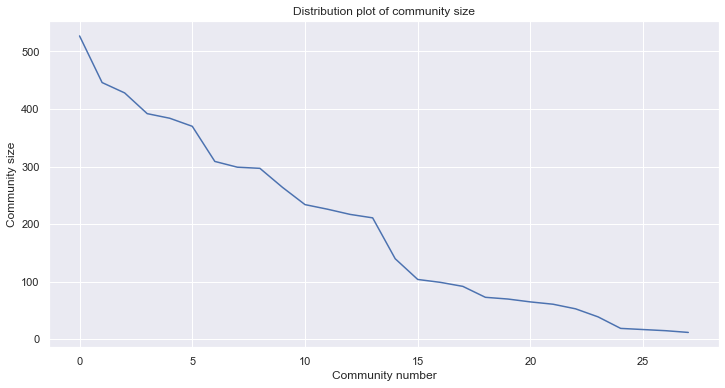

In [5]:
G_com_dist = list(d['ComNo'].value_counts())
print(("The size of the communities are: " + str(G_com_dist)))

plt.figure(figsize=[12,6])
plt.plot(range(len(G_com_dist)),G_com_dist )

plt.ylabel('Community size')
plt.xlabel('Community number')
plt.title('Distribution plot of community size')
plt.savefig('comsizedist.jpg')

plt.show()

In [6]:
comthree = sum(G_com_dist[:3])/sum(G_com_dist)*100
print(f'Top three largest communities are counting for %d percent of the nodes'%(comthree))

Top three largest communities are counting for 25 percent of the nodes


On the above plot we can see the size of the 24 communities. Top three communities are big and stand for 29% of the athletes, and the the curve are slowling flattening out, where only 10 and 6 athletes are in the two smallest communities. 

We can now plot the network again, now with different colors depending on the community: 

100%|██████████| 100/100 [00:15<00:00,  6.35it/s]


BarnesHut Approximation  took  2.21  seconds
Repulsion forces  took  13.14  seconds
Gravitational forces  took  0.05  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.17  seconds


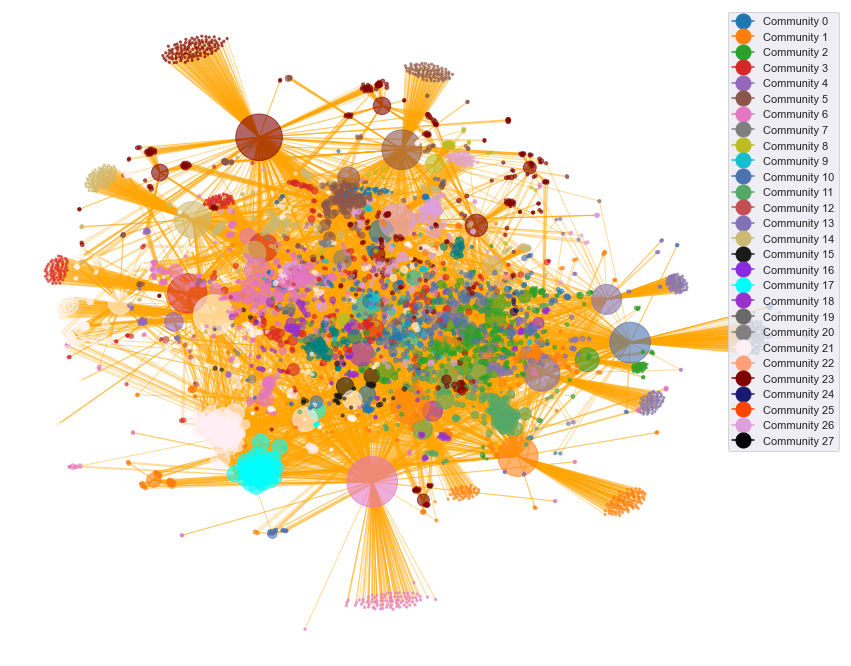

In [8]:
# List of colors
cnames = pickle.load(open('cnames.txt','rb'))

#Generete a list with the used colors in the network graph
node_c =[]
node_c.append(list(mcolors.TABLEAU_COLORS.keys())[0])
node_c.append(list(mcolors.TABLEAU_COLORS.keys())[1])  
node_c.append(list(mcolors.TABLEAU_COLORS.keys())[2])  
node_c.append(list(mcolors.TABLEAU_COLORS.keys())[3])  
node_c.append(list(mcolors.TABLEAU_COLORS.keys())[4])  
node_c.append(list(mcolors.TABLEAU_COLORS.keys())[5])  
node_c.append(list(mcolors.TABLEAU_COLORS.keys())[6])  
node_c.append(list(mcolors.TABLEAU_COLORS.keys())[7])  
node_c.append(list(mcolors.TABLEAU_COLORS.keys())[8])  
node_c.append(list(mcolors.TABLEAU_COLORS.keys())[9])
node_c.append(list(mcolors.BASE_COLORS.keys())[0]) 
node_c.append(list(mcolors.BASE_COLORS.keys())[1]) 
node_c.append(list(mcolors.BASE_COLORS.keys())[2]) 
node_c.append(list(mcolors.BASE_COLORS.keys())[4]) 
node_c.append(list(mcolors.BASE_COLORS.keys())[5]) 
node_c.append(list(mcolors.BASE_COLORS.keys())[6])    
node_c.append(list(cnames.values())[10])
node_c.append(list(cnames.values())[20])  
node_c.append(list(cnames.values())[30]) 
node_c.append(list(cnames.values())[40]) 
node_c.append(list(cnames.values())[50]) 
node_c.append(list(cnames.values())[60])
node_c.append(list(cnames.values())[70])
node_c.append(list(cnames.values())[80]) 
node_c.append(list(cnames.values())[90]) 
node_c.append(list(cnames.values())[100])
node_c.append(list(cnames.values())[110])
node_c.append('black')

#Node color
node_color = []

# for each node in the graph
for node in G.nodes(data=True):
    # if the node has the attribute contries
    if 0 == node[1]['ComNo']:
        
        node_color.append(list(mcolors.TABLEAU_COLORS.keys())[0])
        
    elif 1 == node[1]['ComNo']:
        node_color.append(list(mcolors.TABLEAU_COLORS.keys())[1])  
    elif 2 == node[1]['ComNo']:
        node_color.append(list(mcolors.TABLEAU_COLORS.keys())[2])  
    elif 3 == node[1]['ComNo']:
        node_color.append(list(mcolors.TABLEAU_COLORS.keys())[3])  
    elif 4 == node[1]['ComNo']:
        node_color.append(list(mcolors.TABLEAU_COLORS.keys())[4])  
    elif 5 == node[1]['ComNo']:
        node_color.append(list(mcolors.TABLEAU_COLORS.keys())[5])  
    elif 6 == node[1]['ComNo']:
        node_color.append(list(mcolors.TABLEAU_COLORS.keys())[6])  
    elif 7 == node[1]['ComNo']:
        node_color.append(list(mcolors.TABLEAU_COLORS.keys())[7])  
    elif 8 == node[1]['ComNo']:
        node_color.append(list(mcolors.TABLEAU_COLORS.keys())[8])  
    elif 9 == node[1]['ComNo']:
        node_color.append(list(mcolors.TABLEAU_COLORS.keys())[9])
    elif 10 == node[1]['ComNo']:
        node_color.append(list(mcolors.BASE_COLORS.keys())[0]) 
    elif 11 == node[1]['ComNo']:
        node_color.append(list(mcolors.BASE_COLORS.keys())[1]) 
    elif 12 == node[1]['ComNo']:
        node_color.append(list(mcolors.BASE_COLORS.keys())[2]) 
    elif 13 == node[1]['ComNo']:
        node_color.append(list(mcolors.BASE_COLORS.keys())[4]) 
    elif 14 == node[1]['ComNo']:
        node_color.append(list(mcolors.BASE_COLORS.keys())[5]) 
    elif 15 == node[1]['ComNo']:
        node_color.append(list(mcolors.BASE_COLORS.keys())[6])    
    elif 16 == node[1]['ComNo']:
        node_color.append(list(cnames.values())[10]) 
    elif 17 == node[1]['ComNo']:
        node_color.append(list(cnames.values())[20])  
    elif 18 == node[1]['ComNo']:
        node_color.append(list(cnames.values())[30]) 
    elif 19 == node[1]['ComNo']:
        node_color.append(list(cnames.values())[40]) 
    elif 20 == node[1]['ComNo']:
        node_color.append(list(cnames.values())[50]) 
    elif 21 == node[1]['ComNo']:
        node_color.append(list(cnames.values())[60])
    elif 22 == node[1]['ComNo']:
        node_color.append(list(cnames.values())[70]) 
    elif 23 == node[1]['ComNo']:
        node_color.append(list(cnames.values())[80]) 
    elif 24 == node[1]['ComNo']:
        node_color.append(list(cnames.values())[90]) 
    elif 25 == node[1]['ComNo']:
        node_color.append(list(cnames.values())[110])
    elif 26 == node[1]['ComNo']:
        node_color.append(list(cnames.values())[120]) 
    

    else:
        node_color.append(list(cnames.values())[130])
        
# Node-size
G_Degree = [G.degree(i)*5 for i in G.nodes()]
    
        
# custom legends
legend_elements = [Line2D([0], [0], marker='o', color=node_c[0], label='Community 0',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[1], label='Community 1',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[2], label='Community 2',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[3], label='Community 3',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[4], label='Community 4',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[5], label='Community 5',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[6], label='Community 6',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[7], label='Community 7',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[8], label='Community 8',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[9], label='Community 9',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[10], label='Community 10',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[11], label='Community 11',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[12], label='Community 12',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[13], label='Community 13',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[14], label='Community 14',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[15], label='Community 15',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[16], label='Community 16',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[17], label='Community 17',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[18], label='Community 18',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[19], label='Community 19',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[20], label='Community 20',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[21], label='Community 21',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[22], label='Community 22',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[23], label='Community 23',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[24], label='Community 24',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[25], label='Community 25',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[26], label='Community 26',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[27], label='Community 27',
                           markersize=15)]
         
#Show the visualisation
plt.figure(figsize=(15,12))
positions = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=100)
nx.draw_networkx_nodes(G, positions, node_size = G_Degree,  node_color = node_color,  alpha=0.6)
nx.draw_networkx_edges(G, positions, edge_color="orange",alpha=0.4)
plt.axis('off')
plt.legend(handles=legend_elements,loc='upper right')
plt.savefig('athletecom.jpg')
plt.show()
        

#### Term Frequency distribution

There a clearly big communities and also small once. But who are the they and what makes them share communities? Lets investigate this.
We will start by looking at the atheletes Wikipedia pages, to investigate the specific theme of each community, and to detremine if there is a tendency. 

The Term frequency is calculated. The code gets all the saved athletes files, cleans them up (remove stopwirds, punktuations etc), and then count the words in each text. It is chosen to use the *TF log normalization*, since the texts of the athletes vary a lot. As an example, the text of famous athletes as Usan Bolt are 230759 words long, whereas an unknown athlete as Katja Salskov-Iversen is 2104 words long. 
When using the *TF log normalization* the term frequency are getting logaritimic weights, wich is also great for the speed of both the TF algorithm and the IDF algorithm, since thise numbers are much smaller and hence shorter running time.

$\log(1+f_{{t,d}})$ (Where $f_{t,d}$ is the raw count TF)


In [20]:
# Function to create the TF_lists:
def TFList(df, nodetype, ComNo):
    ### ALL TEXT INTO ONE LIST: ###
    # Folder with all the downloaded wikipages
    path_folder = ("./Files/")    
    
    # An empty sting
    f = ""   
    # For every wikipage in the universe add the text to the 'f' string. Such that all wikipages texts are in one string.
    for i in range(df.shape[0]):
        if df['ComNo'].iloc[i] == ComNo:
            Node = df['WikiLink'].iloc[i]                            # Open the page file
            f += io.open(path_folder + nodetype + Node + ".txt",'r',encoding = 'utf-8').read()
        
    
    ### DATA CLEANING: ###
    # Remove all punctuation from your list of tokens
    tokens = word_tokenize(f)
    onlywords= [word for word in tokens if word.isalnum()]
    
    # Set everything to lower case
    onlywords = [w.lower() for w in onlywords]
    
    #  and remove stopwords
    stops = nltk.corpus.stopwords.words('english')
    words = [w for w in onlywords if w.lower() not in stops]
    
    
    ### WORD FREQUENCY:###
    # Count the words frequency
    FreqWord = nltk.FreqDist(words) 
    tf_w = copy.deepcopy(FreqWord)# Copy the dictionary
    
    # Calculate a log normalization to the frequency
    for key, value in FreqWord.items():
        w = np.log(1 + value)
        tf_w[key] = w
    
    # Return tf_w, TF and list of words:
    return tf_w, words


Run the TFList function

In [21]:
# Number of communities:
NC = len(set(partition.values()))

# Create the TFLIST and wordlist for all communities:
TFListCom = []
Words = []
for i in range(NC):
    TFListCom.append(TFList(d_a, 'athletes_', i)[0])
    Words.append(TFList(d_a, 'athletes_', i)[1])
    
# Run for countries
for i in range(NC):
    TFListCom.append(TFList(d_c, 'countries_', i)[0])
    Words.append(TFList(d_c, 'countries_', i)[1])

# Run for events 
for i in range(NC):
    TFListCom.append(TFList(d_e, 'events_', i)[0])
    Words.append(TFList(d_e, 'events_', i)[1])

Following print top five words for each community for the log normalize TF: 

In [22]:
for i in range(NC):
    print("Top 5 TF for community %d:"%i)
    print(list({k: v for k, v in sorted(TFListCom[i].items(), key=lambda item: item[1],reverse = True)}.items())[:5])
    print("")

Top 5 TF for community 0:
[('category', 7.7475968386928855), ('championships', 7.558516743045645), ('2016', 7.2868764117507), ('world', 7.261927092702751), ('ref', 7.190676034332207)]

Top 5 TF for community 1:
[('category', 8.33302993974291), ('world', 8.161660452056282), ('championships', 8.07246736935477), ('european', 8.001019961323651), ('summer', 7.851661177889265)]

Top 5 TF for community 2:
[('category', 8.470939806898775), ('championships', 8.157370441186774), ('2016', 7.930206206684683), ('world', 7.907283609426348), ('games', 7.8826922062890254)]

Top 5 TF for community 3:
[('championships', 8.340217320947035), ('category', 8.285008895449879), ('american', 8.10076824307173), ('world', 8.0702808933939), ('ref', 8.026823576217629)]

Top 5 TF for community 4:
[('american', 7.187657164114956), ('category', 6.825460036255307), ('pan', 6.548219102762372), ('championships', 6.53813982376767), ('games', 6.52795791762255)]

Top 5 TF for community 5:
[('swimming', 8.771680359010377), 

By looking at the tem frequency for each community, the top five words for each community already tell a lot about the specific community. As an example, community 26 might have many of the "swimming" athlets. However, words such as "world", "championships" and "ref" appears in lots of the community top five. Hence IDF is calculated. 

*Inverse document frequency* is a measure of hos much information the word provides. The function takes all dokuments into account, and calculate the relative importance. It is the logarithmically scaled inverse fraction of the documents that contain the word. This is done by dividing the toatl number of documents by the number of documents containg the term, and afterwrads taking the logarithm of that. [wiki](https://en.wikipedia.org/wiki/Tf%E2%80%93idf)  

IDF are calculated using following formula:

 ${\displaystyle \log \left({\frac {N}{1+n_{t}}}\right)+1}$

 Where:

 N = Total number of Communities

 $n_{t}$ = The number of communities containing the term t.

Furthermore, the TF-IDF are calculated, to make sure that the TF are weighted to scale words that are rare higher, and words that appear in each document, lower. 
 ${\displaystyle \mathrm {TFIDF} (t,d,D)=\mathrm {TF} (t,d)\cdot \mathrm {IDF} (t,D)}$   

 Both IDF and TF-IDF are calculated below: 

In [23]:
#Function to create the TF-IDF_List for each community.
def TF_IDFList(TFList, wordList):
    
    #creating empty dictionary:
    n_t = defaultdict(int)

    #Counting n_t for each word:
    for community_word_list in wordList:
        for word in set(community_word_list):
            n_t[word] += 1
    
    # Copy dictionary:
    IDF = copy.deepcopy(n_t)
    
    # Calculate the IDF-value for each word:      
    for key, value in n_t.items():
        IDF_value = np.log(len(wordList)/(value+1))+1
        IDF[key] = IDF_value
    
    # Copy dictionary:
    TF_IDF = copy.deepcopy(TFList)
    
    # Now calculating TF-IDF by multiplying TF-value and IDF-value in the dictionary: 
    for dic in range(len(TFList)):
        for key, value in TFList[dic].items(): #looking at the TF lists
            for key1, value1 in IDF.items(): #Lokking at the IDF dict
                if key == key1: #check if the keys are equal
                    new_value = np.dot(value, value1) #Calculating the value. 
                    TF_IDF[dic][key] = new_value #replacing the value
    return TF_IDF

# Create the TF-IDF List for all communities:
TF_IDF = TF_IDFList(TFListCom, Words)


In [24]:
for i in range(NC):
    print("top 5 TF_IDF for community %d:"%i)
    print(list({k: v for k, v in sorted(TF_IDF[i].items(), key=lambda item: item[1],reverse = True)}.items())[:5])
    print("")

top 5 TF_IDF for community 0:
[('lariba', 16.58645752571355), ('aminu', 16.491691682534096), ('drinkhall', 16.491240406897752), ('barbuda', 15.902356992769628), ('uaap', 15.614586186886982)]

top 5 TF_IDF for community 1:
[('belgorod', 17.81932351640528), ('fiamme', 15.736375400006303), ('polo', 15.6303103504794), ('imboden', 15.117088635944224), ('hoxha', 14.734682636832886)]

top 5 TF_IDF for community 2:
[('yes2', 22.775562403149006), ('dershwitz', 18.150441169483813), ('algerian', 15.563272900041577), ('armenian', 15.080550791089795), ('aleksanyan', 15.019625547888516)]

top 5 TF_IDF for community 3:
[('neymar', 21.155954277434773), ('omegatiming', 20.3191974910044), ('marquinhos', 18.78434320113574), ('psg', 18.502521198656606), ('etiene', 17.664726104896634)]

top 5 TF_IDF for community 4:
[('suhr', 16.124337655600968), ('argentine', 15.37358866837341), ('arg', 14.582915199930683), ('fh', 14.516141632368056), ('murer', 13.900594948272783)]

top 5 TF_IDF for community 5:
[('fdffe7

#### Word clouds for each community

The TF-IDF can now be investigated. An easy an intuitive way is to create word clouds, so that the most meaningfull words appear as the biggest words in the word cloud.  

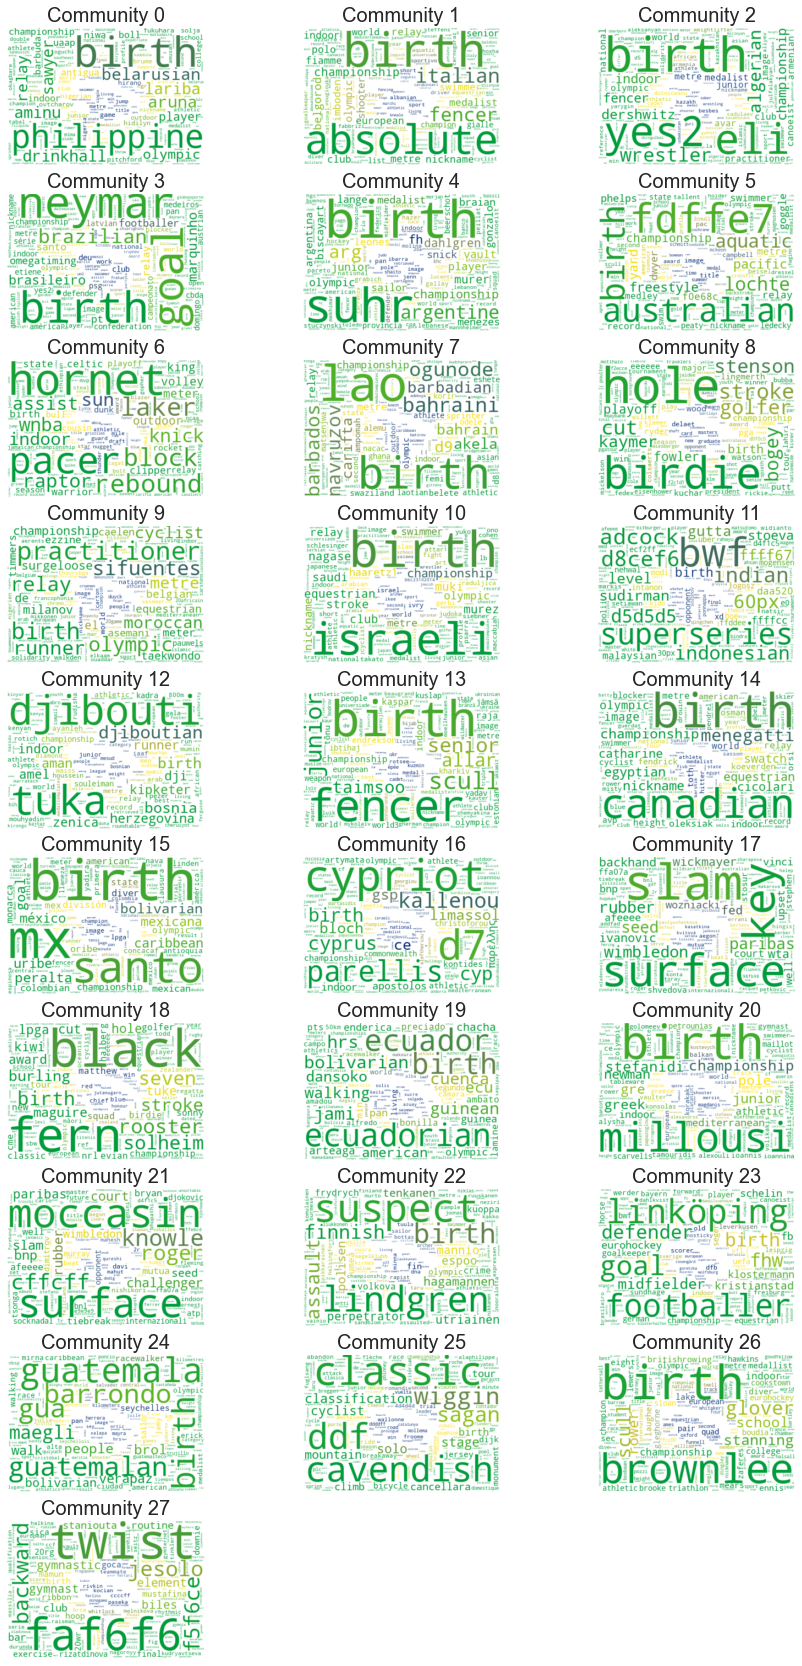

In [37]:
flag = np.array(Image.open("flag.PNG"))
Communitie_WordCloudList = []
athletes_com_wordcloud = []
#Generate the wordclouds: 
for i in range(NC):
    Communitie_WordCloudList.append(' '.join([word for word in list(TF_IDF[i].keys()) for j in range(int(TF_IDF[i][word]))]))
for i in range(NC):
    athletes_com_wordcloud.append(WordCloud(collocations = False,
                              background_color = 'White',
                              stopwords = STOPWORDS,
#                               max_font_size = 100, 
#                               max_words = 50,
                            width = 800, 
                            height = 400,
                            mask=flag,
                             
                            ).generate(Communitie_WordCloudList[i]))

# Generate a single figure
plt.figure(figsize=(15,30))
image_colors = ImageColorGenerator(flag)
for i in range(NC):
    # Display the wordcloud:
    
    plt.subplot(10,3, i+1)
    plt.imshow(athletes_com_wordcloud[i].recolor(color_func=image_colors), interpolation="bilinear", )
    plt.title('Community %d'%i,fontsize=20,ha='center')
    
    plt.axis("off")
    
plt.savefig('wordC.jpg')

Looking at the word clouds for each community, there is no clear tendency. What is the most eye-catching is the *birth* word presented is quite a lot of the word clouds. Why? Looking at the Country Wikipedia pages, all of the pages have *date of birth* as a column name in a table of the athletes representing their country at Rio 2016. The idea behind IDF is, that it should put weight on such words so that it would not appear as important. However, the country nodes in the network only stand for a small percentage of the full network (11%), hence the word birth is actually presented in few pages, and therefore gets a high weight. This result leads to wondering. Does it make sense to create word clouds and communities on athletes, countries, and events as *one* kind of node? Maybe it would be more insightful to only analyze the athletes, and detect how these are grouped into communities.  

## 3.2 Athletes sub network

This section will look into the isolated Athletes network, to discover insightful knowledge of the Rio 2016 athletes. How are the athletes divided into communities? What do they have in common? How many communities are there? And who are the big once, and who are the small once? Are the size of the community reflecting the sport?

### 3.2.1 Communities in the Athletes Network

In [2]:
# Re load the total Graph 
G = pickle.load(open('G.txt','rb'))
 
# create a network for Athletes
nodes = (n for n, data in G.nodes(data=True) if (data.get("nodetype") == 'athletes'))
G_aT = G.subgraph(nodes)
print(f"The number of nodes in the network: {G_aT.number_of_nodes()}")
print(f"The number of links in the network: {G_aT.number_of_edges()}")

The number of nodes in the network: 5279
The number of links in the network: 7232


100%|██████████| 100/100 [00:11<00:00,  8.63it/s]


BarnesHut Approximation  took  2.07  seconds
Repulsion forces  took  9.17  seconds
Gravitational forces  took  0.03  seconds
Attraction forces  took  0.01  seconds
AdjustSpeedAndApplyForces step  took  0.16  seconds


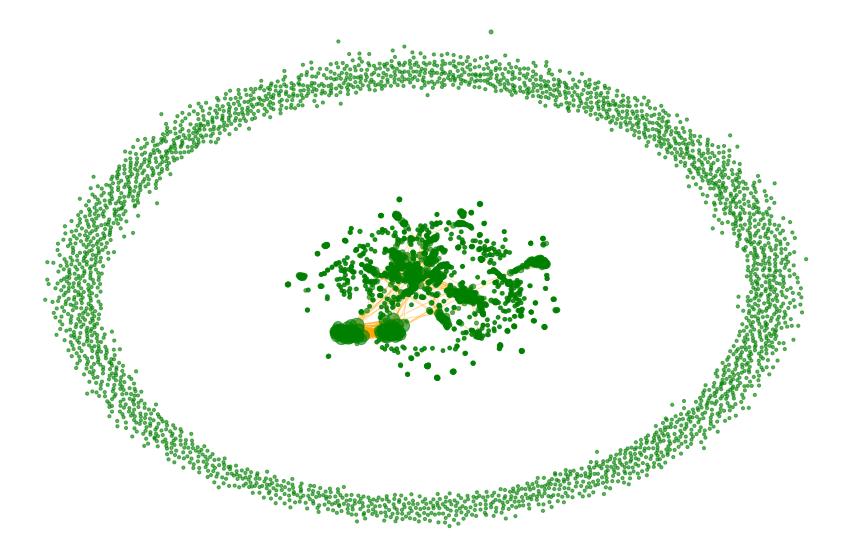

In [3]:
#Convert to an undirected graph
G_aT = G_aT.to_undirected()

# Node-size
G_aT_Degree = [G_aT.degree(i)*3+10 for i in G_aT.nodes()]
          
#Show the visualisation
plt.figure(figsize=(15,10))
positions = forceatlas2.forceatlas2_networkx_layout(G_aT, pos=None, iterations=100)
nx.draw_networkx_nodes(G_aT, positions, node_size = G_aT_Degree, node_color = "green",  alpha=0.6)
nx.draw_networkx_edges(G_aT, positions, edge_color="orange",alpha=0.4)
plt.axis('off')
plt.savefig('atletnetwork.jpg')
plt.show()

OK, we can see that many athlets are not connected to anyone ells. Lets look at the Giant component. 

In [4]:
# Re load the total Graph 
G = pickle.load(open('G.txt','rb'))
 
# create a network for Athletes
nodes = (n for n, data in G.nodes(data=True) if (data.get("nodetype") == 'athletes'))
G_a = G.subgraph(nodes)

largest_cc = max(nx.weakly_connected_components(G_a), key=len)
G_a = G_a.subgraph(largest_cc).copy()
print(f"The number of nodes in the network: {G_a.number_of_nodes()}")
print(f"The number of links in the network: {G_a.number_of_edges()}")

The number of nodes in the network: 1338
The number of links in the network: 5947


Lets plot it again: 

100%|██████████| 100/100 [00:01<00:00, 51.32it/s]


BarnesHut Approximation  took  0.43  seconds
Repulsion forces  took  1.43  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.01  seconds
AdjustSpeedAndApplyForces step  took  0.04  seconds


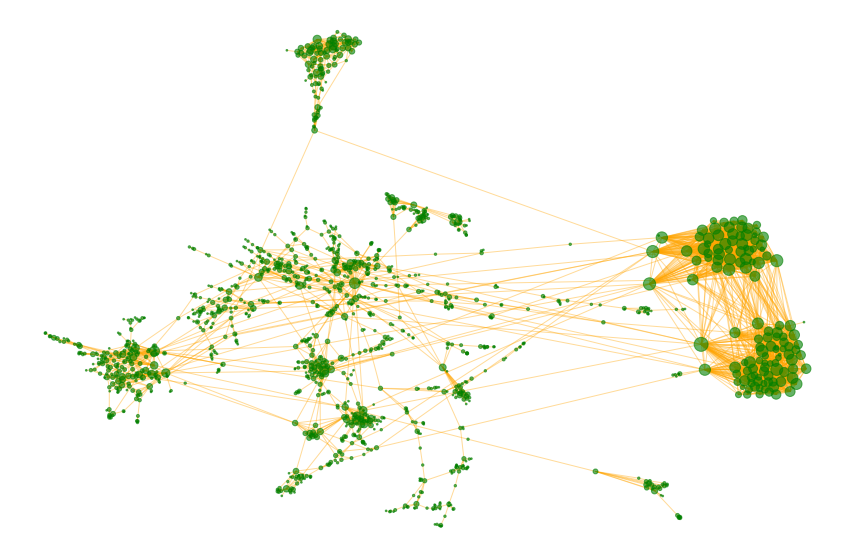

In [5]:
#Convert to an undirected graph
G_a = G_a.to_undirected()

# Node-size
G_a_Degree = [G_a.degree(i)*3 for i in G_a.nodes()]
    
#Show the visualisation
plt.figure(figsize=(15,10))
positions = forceatlas2.forceatlas2_networkx_layout(G_a, pos=None, iterations=100)
nx.draw_networkx_nodes(G_a, positions, node_size = G_a_Degree, node_color = "green",  alpha=0.6)
nx.draw_networkx_edges(G_a, positions, edge_color="orange",alpha=0.4)
plt.savefig('atletGC.jpg')
plt.axis('off')
plt.show()

In [6]:
# Identify the communities. Chosen algorithm is "best partition".
partition = community.best_partition(G_a, weight='weight', resolution=1.0, randomize=False, random_state=False)
print(f"Number of communities: {len(set(partition.values()))}")

Number of communities: 22


 Add community number to data frame and add dataframe as attributes to the dataframe

In [7]:
d = pd.DataFrame.from_dict(partition,orient='index')
d.reset_index(inplace=True)
d = d.rename(columns = {'index':'WikiLink',0:'ComNo'})
d_a = d.merge(df_a, on='WikiLink', how='inner')

#ADD data from dataframe as attributes to graph
node_attr = d_a.set_index('WikiLink').to_dict('index')
nx.set_node_attributes(G_a, node_attr)

Plot distribution of communities to see the size of all the communities - meaning how many athletes are in each community.

The size of the communities are: [185, 153, 112, 88, 81, 77, 77, 73, 72, 61, 56, 55, 37, 36, 33, 29, 27, 26, 23, 17, 14, 6]


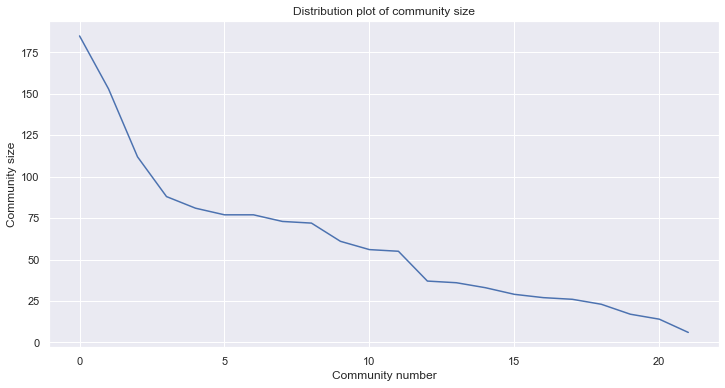

In [8]:
G_a_com_dist = list(d_a['ComNo'].value_counts())
print(("The size of the communities are: " + str(G_a_com_dist)))

plt.figure(figsize=[12,6])
plt.plot(range(len(G_a_com_dist )),G_a_com_dist)

plt.ylabel('Community size')
plt.xlabel('Community number')
plt.title('Distribution plot of community size')
plt.savefig('comsizedist.jpg')

plt.show()

In [9]:
comthree = sum(G_a_com_dist[:3])/sum(G_a_com_dist)*100
print(f'Top three largest communities are counting for %d percent of the athletes'%(comthree))

Top three largest communities are counting for 33 percent of the athletes


On the above plot we can see the size of the **XX** communities. Top three communities are big and stand for 29% of the athletes, and the the curve are slowling flattening out, where only **XX** and **XX** athletes are in the two smallest communities. 

We can now plot the network again, now with different colors depending on the community: 

100%|██████████| 100/100 [00:02<00:00, 48.96it/s]


BarnesHut Approximation  took  0.44  seconds
Repulsion forces  took  1.50  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.01  seconds
AdjustSpeedAndApplyForces step  took  0.04  seconds


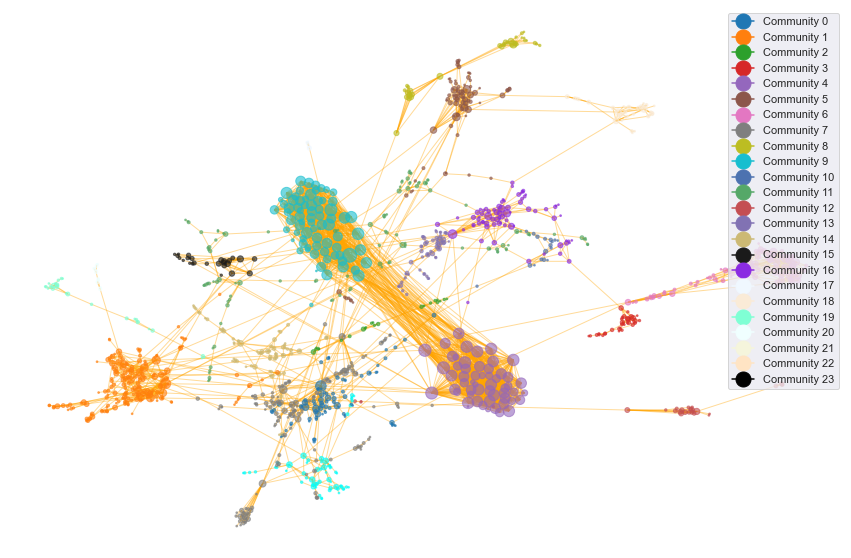

In [10]:
#Generete a list with the used colors in the network graph
node_c =[]

node_c.append(list(mcolors.TABLEAU_COLORS.keys())[0])
node_c.append(list(mcolors.TABLEAU_COLORS.keys())[1])  
node_c.append(list(mcolors.TABLEAU_COLORS.keys())[2])  
node_c.append(list(mcolors.TABLEAU_COLORS.keys())[3])  
node_c.append(list(mcolors.TABLEAU_COLORS.keys())[4])  
node_c.append(list(mcolors.TABLEAU_COLORS.keys())[5])  
node_c.append(list(mcolors.TABLEAU_COLORS.keys())[6])  
node_c.append(list(mcolors.TABLEAU_COLORS.keys())[7])  
node_c.append(list(mcolors.TABLEAU_COLORS.keys())[8])  
node_c.append(list(mcolors.TABLEAU_COLORS.keys())[9])
node_c.append(list(mcolors.BASE_COLORS.keys())[0]) 
node_c.append(list(mcolors.BASE_COLORS.keys())[1]) 
node_c.append(list(mcolors.BASE_COLORS.keys())[2]) 
node_c.append(list(mcolors.BASE_COLORS.keys())[4]) 
node_c.append(list(mcolors.BASE_COLORS.keys())[5]) 
node_c.append(list(mcolors.BASE_COLORS.keys())[6])    
node_c.append(list(cnames.values())[10])
node_c.append(list(cnames.values())[0])  
node_c.append(list(cnames.values())[1]) 
node_c.append(list(cnames.values())[3]) 
node_c.append(list(cnames.values())[4]) 
node_c.append(list(cnames.values())[5])
node_c.append(list(cnames.values())[6])
node_c.append('black')

#Node color
node_color = []

# for each node in the graph
for node in G_a.nodes(data=True):
    # if the node has the attribute contries
    if 0 == node[1]['ComNo']:
        
        node_color.append(list(mcolors.TABLEAU_COLORS.keys())[0])
        
    elif 1 == node[1]['ComNo']:
        node_color.append(list(mcolors.TABLEAU_COLORS.keys())[1])  
    elif 2 == node[1]['ComNo']:
        node_color.append(list(mcolors.TABLEAU_COLORS.keys())[2])  
    elif 3 == node[1]['ComNo']:
        node_color.append(list(mcolors.TABLEAU_COLORS.keys())[3])  
    elif 4 == node[1]['ComNo']:
        node_color.append(list(mcolors.TABLEAU_COLORS.keys())[4])  
    elif 5 == node[1]['ComNo']:
        node_color.append(list(mcolors.TABLEAU_COLORS.keys())[5])  
    elif 6 == node[1]['ComNo']:
        node_color.append(list(mcolors.TABLEAU_COLORS.keys())[6])  
    elif 7 == node[1]['ComNo']:
        node_color.append(list(mcolors.TABLEAU_COLORS.keys())[7])  
    elif 8 == node[1]['ComNo']:
        node_color.append(list(mcolors.TABLEAU_COLORS.keys())[8])  
    elif 9 == node[1]['ComNo']:
        node_color.append(list(mcolors.TABLEAU_COLORS.keys())[9])
    elif 10 == node[1]['ComNo']:
        node_color.append(list(mcolors.BASE_COLORS.keys())[0]) 
    elif 11 == node[1]['ComNo']:
        node_color.append(list(mcolors.BASE_COLORS.keys())[1]) 
    elif 12 == node[1]['ComNo']:
        node_color.append(list(mcolors.BASE_COLORS.keys())[2]) 
    elif 13 == node[1]['ComNo']:
        node_color.append(list(mcolors.BASE_COLORS.keys())[4]) 
    elif 14 == node[1]['ComNo']:
        node_color.append(list(mcolors.BASE_COLORS.keys())[5]) 
    elif 15 == node[1]['ComNo']:
        node_color.append(list(mcolors.BASE_COLORS.keys())[6])    
    elif 16 == node[1]['ComNo']:
        node_color.append(list(cnames.values())[10]) 
    elif 17 == node[1]['ComNo']:
        node_color.append(list(cnames.values())[0])  
    elif 18 == node[1]['ComNo']:
        node_color.append(list(cnames.values())[1]) 
    elif 19 == node[1]['ComNo']:
        node_color.append(list(cnames.values())[2]) 
    elif 20 == node[1]['ComNo']:
        node_color.append(list(cnames.values())[3]) 
    elif 21 == node[1]['ComNo']:
        node_color.append(list(cnames.values())[4])
    elif 22 == node[1]['ComNo']:
        node_color.append(list(cnames.values())[5]) 
    

    else:
        node_color.append('black')
        
# Node-size
G_a_Degree = [G_a.degree(i)*3 for i in G_a.nodes()]
        
        
# custom legends
legend_elements = [Line2D([0], [0], marker='o', color=node_c[0], label='Community 0',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[1], label='Community 1',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[2], label='Community 2',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[3], label='Community 3',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[4], label='Community 4',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[5], label='Community 5',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[6], label='Community 6',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[7], label='Community 7',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[8], label='Community 8',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[9], label='Community 9',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[10], label='Community 10',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[11], label='Community 11',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[12], label='Community 12',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[13], label='Community 13',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[14], label='Community 14',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[15], label='Community 15',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[16], label='Community 16',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[17], label='Community 17',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[18], label='Community 18',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[19], label='Community 19',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[20], label='Community 20',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[21], label='Community 21',
                           markersize=15),
                   Line2D([0], [0], marker='o', color=node_c[22], label='Community 22',
                           markersize=15),
                   Line2D([0], [0], marker='o', color='black', label='Community 23',
                           markersize=15) ]
         
#Show the visualisation
plt.figure(figsize=(15,10))
positions = forceatlas2.forceatlas2_networkx_layout(G_a, pos=None, iterations=100)
nx.draw_networkx_nodes(G_a, positions, node_size = G_a_Degree,  node_color = node_color,  alpha=0.6)
nx.draw_networkx_edges(G_a, positions, edge_color="orange",alpha=0.4)

plt.axis('off')
plt.legend(handles=legend_elements,loc='upper right')
plt.savefig('athletecom.jpg')
plt.show()
        

There are clearly big communities and also small ones. But who are they and what makes them share communities? Let's investigate this.
We will start by looking at the athletes' Wikipedia pages, to investigate the specific theme of each community, and to determine if there is a tendency. 

#### Term Frequency distribution

The Term frequency is calculated. The code gets all the saved athletes files, cleans them up (remove stopwirds, punktuations etc), and then count the words in each text. It is chosen to use the *TF log normalization*, since the texts of the athletes vary a lot. As an example, the text of famous athletes as Usan Bolt are XXX long, whereas an unknown athlete as XXX is XXX long. 
When using the *TF log normalization* the term frequency are getting logaritimic weights, wich is also great for the speed of both the TF algorithm and the IDF algorithm, since thise numbers are much smaller and hence shorter running time.

$\log(1+f_{{t,d}})$ (Where $f_{t,d}$ is the raw count TF)



In [11]:
# Function to create the TF_lists:
def TFList(df, nodetype, ComNo):
    ### ALL TEXT INTO ONE LIST: ###
    # Folder with all the downloaded wikipages
    path_folder = ("./Files/")    
    
    # An empty sting
    f = ""   
    # For every wikipage in the universe add the text to the 'f' string. Such that all wikipages texts are in one string.
    for i in range(df.shape[0]):
        if df['ComNo'].iloc[i] == ComNo:
            Node = df['WikiLink'].iloc[i]                            # Open the page file
            f += io.open(path_folder + nodetype + Node + ".txt",'r',encoding = 'utf-8').read()
        
    
    ### DATA CLEANING: ###
    # Remove all punctuation from your list of tokens
    tokens = word_tokenize(f)
    onlywords= [word for word in tokens if word.isalnum()]
    
    # Set everything to lower case
    onlywords = [w.lower() for w in onlywords]
    
    #  and remove stopwords
    stops = nltk.corpus.stopwords.words('english')
    words = [w for w in onlywords if w.lower() not in stops]
    
    
    ### WORD FREQUENCY:###
    # Count the words frequency
    FreqWord = nltk.FreqDist(words) 
    tf_w = copy.deepcopy(FreqWord)# Copy the dictionary
    
    # Calculate a log normalization to the frequency
    for key, value in FreqWord.items():
        w = np.log(1 + value)
        tf_w[key] = w
    
    # Return tf_w, TF and list of words:
    return tf_w, words
    

In [12]:
# Number of communities:
NC = d_a['ComNo'].nunique()

# Create the TFLIST and wordlist for all communities:
TFListCom = []
Words = []
for i in range(NC):
    TFListCom.append(TFList(d_a, 'athletes_', i)[0])
    Words.append(TFList(d_a, 'athletes_', i)[1])

Now lets calcualte the IDF and TF-IDF once again: 

In [13]:
#Function to create the TF-IDF_List for each community.
def TF_IDFList(TFList, wordList):
    
    #creating empty dictionary:
    n_t = defaultdict(int)

    #Counting n_t for each word:
    for community_word_list in wordList:
        for word in set(community_word_list):
            n_t[word] += 1
    
    # Copy dictionary:
    IDF = copy.deepcopy(n_t)
    
    # Calculate the IDF-value for each word:      
    for key, value in n_t.items():
        IDF_value = np.log(len(wordList)/(value+1))+1
        IDF[key] = IDF_value
    
    # Copy dictionary:
    TF_IDF = copy.deepcopy(TFList)
    
    # Now calculating TF-IDF by multiplying TF-value and IDF-value in the dictionary: 
    for dic in range(len(TFList)):
        for key, value in TFList[dic].items(): #looking at the TF lists
            for key1, value1 in IDF.items(): #Lokking at the IDF dict
                if key == key1: #check if the keys are equal
                    new_value = np.dot(value, value1) #Calculating the value. 
                    TF_IDF[dic][key] = new_value #replacing the value
    return TF_IDF

# Create the TF-IDF List for all communities:
TF_IDF = TF_IDFList(TFListCom, Words)



In [14]:
for i in range(NC):
    print("top 5 TF_IDF for community %d:"%i)
    print(list({k: v for k, v in sorted(TF_IDF[i].items(), key=lambda item: item[1],reverse = True)}.items())[:5])
    print("")

top 5 TF_IDF for community 0:
[('neymar', 16.426055617687066), ('marquinhos', 15.781153881220243), ('psg', 15.544388808275453), ('gatlin', 15.333104374752377), ('fifa', 15.1304624680126)]

top 5 TF_IDF for community 1:
[('breaststroke', 21.136913932997917), ('fina', 20.10619539285106), ('aquatics', 19.911284051333983), ('backstroke', 18.921785165011684), ('swimmers', 17.785753740321216)]

top 5 TF_IDF for community 2:
[('judo', 13.04226110480372), ('judoka', 13.02103876381213), ('sasson', 13.009322502370448), ('shehaby', 11.070670824863932), ('d8', 10.885222551024842)]

top 5 TF_IDF for community 3:
[('pga', 19.90822801058922), ('kaymer', 16.295594024214285), ('golfers', 16.112725447515555), ('stenson', 16.063168721887262), ('kuchar', 15.289882007307602)]

top 5 TF_IDF for community 4:
[('wta', 23.817577472145906), ('wimbledon', 20.5585264267368), ('wickmayer', 20.49979515343513), ('vinci', 20.433974300673754), ('shvedova', 19.45922888956253)]

top 5 TF_IDF for community 5:
[('cavendis

Already from looking at the words now compared to the TF-IDF of the big network, we can see that the words make more sense. We can clearly see, that the communities are primarily divided by the sport that they have in common.

#### Word clouds for each community
The TF-IDF are now investtigated by plotting the word clouds


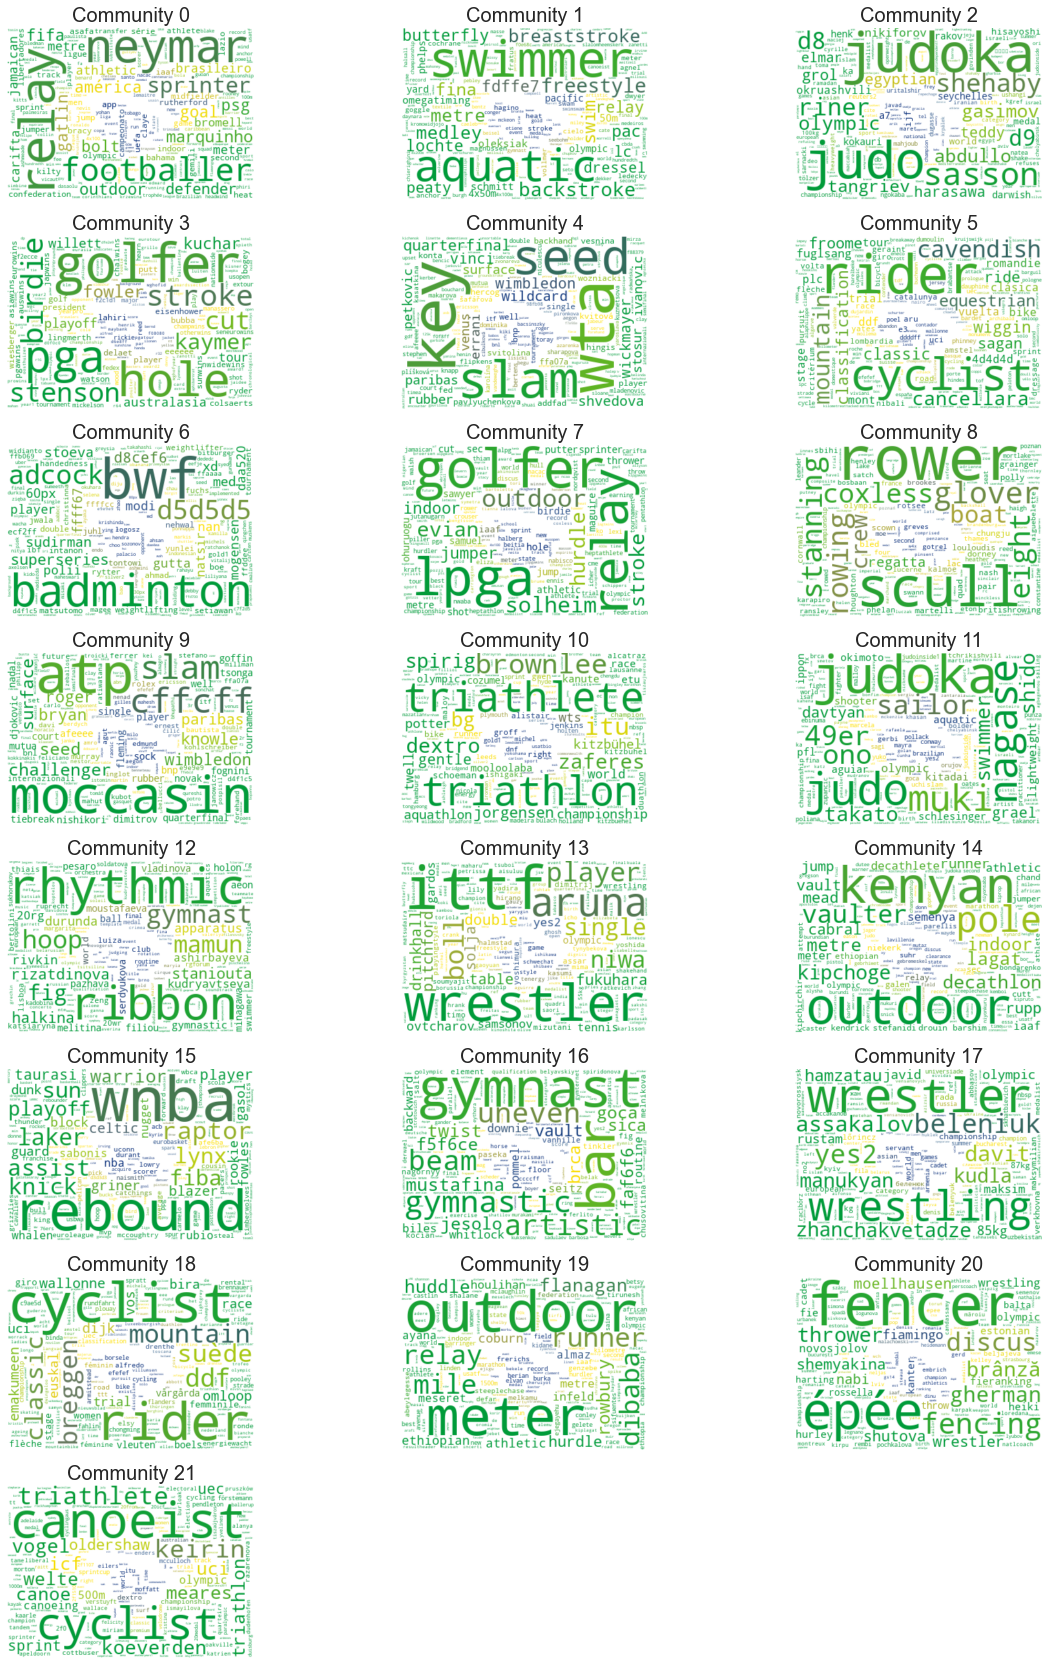

In [15]:
# word
flag = np.array(Image.open("flag.PNG"))
Communitie_WordCloudList = []
athletes_com_wordcloud = []
#Generate the wordclouds: 
for i in range(NC):
    Communitie_WordCloudList.append(' '.join([word for word in list(TF_IDF[i].keys()) for j in range(int(TF_IDF[i][word]))]))
for i in range(NC):
    athletes_com_wordcloud.append(WordCloud(collocations = False,
                              background_color = 'White',
                              stopwords = STOPWORDS,
#                               max_font_size = 100, 
#                               max_words = 50,
                            width = 800, 
                            height = 400,
                            mask=flag,
                             
                            ).generate(Communitie_WordCloudList[i]))

# Generate a single figure
plt.figure(figsize=(20,30))
image_colors = ImageColorGenerator(flag)
for i in range(NC):
    # Display the wordcloud:
    
    plt.subplot(8,3, i+1)
    plt.imshow(athletes_com_wordcloud[i].recolor(color_func=image_colors), interpolation="bilinear", )
    plt.title('Community %d'%i,fontsize=20,ha='center')
    
    plt.axis("off")
    
plt.savefig('wordC.jpg')

Looking at the wordclouds, we can clearly see a difference in the communityes, and alrady by skimming each word cloud, we can conclude that what each community have in commen is their sport.However, some words appear in several communities like **Judo which appear both in community 15 and 0**. 

Some of the words in the communities are names, as example glover. This is a an Olympic rower, [Helen Glover (rower)](https://en.wikipedia.org/wiki/Helen_Glover_(rower)), which won the olympic gold medal in Rio 2016. Hence she is mentined a lot in her community, that in general include the diciplin rowing. 

Looking at community 1 and 2, we can see that they both have diciplins in the "Athletics" area like running, hurdle, relay, mile, outdoor etc. Hence they both represent Athletics, and will get the samae Olympic icon as wordcloud picture. 

OK. Just for the fun of it. Lets plot top five biggest communities with super cool pictures: The icons are found [here](https://icon-icons.com/download/68613/PNG/512/)


In [16]:
#load judo picture: 
judomask = np.array(Image.open("judo1.jpg")) # judo 
row = np.array(Image.open("row.jpg")) # rowing
athletics = np.array(Image.open("atle.jpg")) #athletics
gym = np.array(Image.open("gym.jpg")) #gymnastics

Community zero represent basically **Judo and Sailing**. The word cloud for community zero is plotted as a judo icon. 

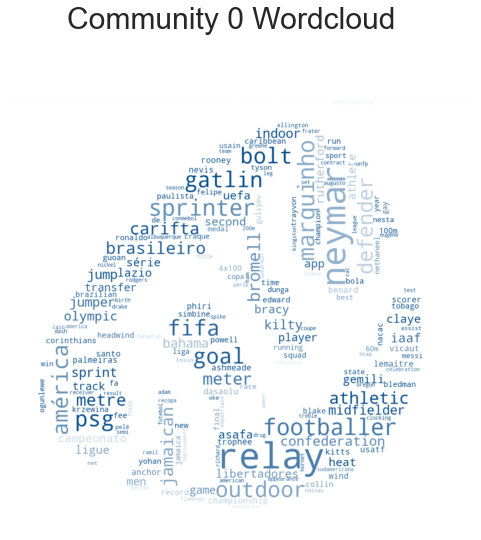

In [17]:
# (The wordcloud package looks for collocations in real texts therefore collocations = False):
judo_wordcloud =  WordCloud(collocations = False,
                              background_color = 'White',
                              stopwords = STOPWORDS,
#                               max_font_size = 100, 
#                               max_words = 500,
                              mask=judomask
                             
                        ).generate(Communitie_WordCloudList[0])




# Display the generated images:
image_colors = ImageColorGenerator(judomask)
plt.figure(figsize=[10,8])
plt.imshow(judo_wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.figtext(.5,1,'Community 0 Wordcloud',fontsize=30,ha='center')
plt.axis("off")
plt.show()


Again Judo (judoka), Judo professionals, Sailing, sailing professionals etc are vizualised on the Judo word cloud. 

Community 1 is plottet as the Olympic rowing icon: 

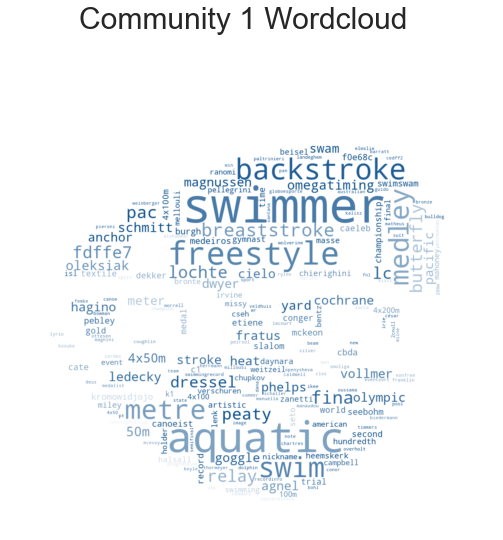

In [18]:
# (The wordcloud package looks for collocations in real texts therefore collocations = False):
row_wordcloud =  WordCloud(collocations = False,
                              background_color = 'White',
                              stopwords = STOPWORDS,
#                               max_font_size = 100, 
#                               max_words = 500,
                              mask=row
                             
                        ).generate(Communitie_WordCloudList[1])

# Display the generated images:
image_colors = ImageColorGenerator(row)
plt.figure(figsize=[10,8])
plt.imshow(row_wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.figtext(.5,1,'Community 1 Wordcloud',fontsize=30,ha='center')
plt.axis("off")
plt.show()

Glover, and her partner Stanning are shown amongst several other rowers and words that relates to their discipline. 

Lets plot community 2: 


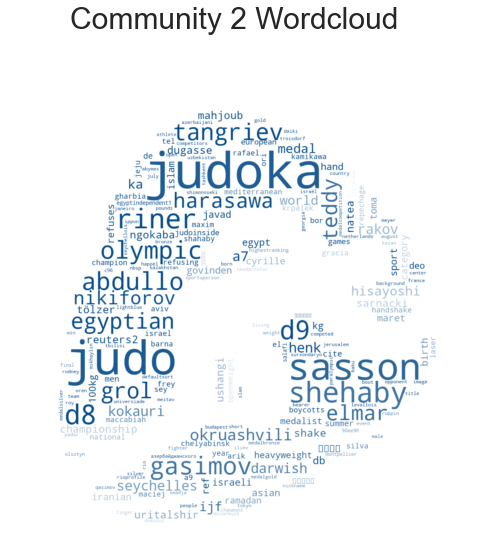

In [19]:
# (The wordcloud package looks for collocations in real texts therefore collocations = False):
atl_wordcloud =  WordCloud(collocations = False,
                              background_color = 'White',
                              stopwords = STOPWORDS,
#                               max_font_size = 100, 
#                               max_words = 500,
                              mask=athletics
                             
                        ).generate(Communitie_WordCloudList[2])

# Display the generated images:
image_colors = ImageColorGenerator(athletics)
plt.figure(figsize=[10,8])
plt.imshow(atl_wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.figtext(.5,1,'Community 2 Wordcloud',fontsize=30,ha='center')
plt.axis("off")
plt.show()

Here relay, hurdle, sprinter etc are shown amongst several famours athletics performers. 

And community 3 are plottet as a word cloud: 

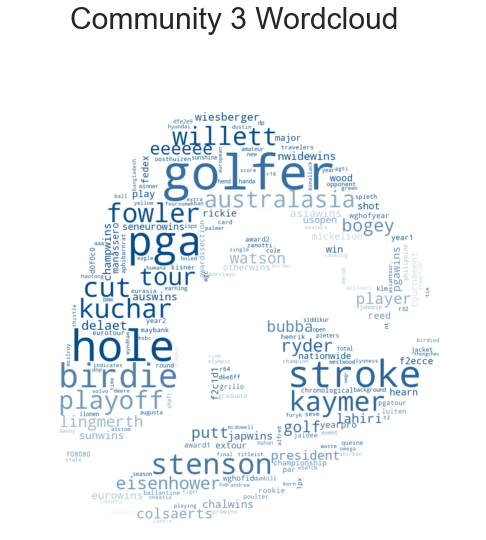

In [20]:
# (The wordcloud package looks for collocations in real texts therefore collocations = False):
atl_wordcloud =  WordCloud(collocations = False,
                              background_color = 'White',
                              stopwords = STOPWORDS,
#                               max_font_size = 100, 
#                               max_words = 500,
                              mask=athletics
                             
                        ).generate(Communitie_WordCloudList[3])

# Display the generated images:
image_colors = ImageColorGenerator(athletics)
plt.figure(figsize=[10,8])
plt.imshow(atl_wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.figtext(.5,1,'Community 3 Wordcloud',fontsize=30,ha='center')
plt.axis("off")
plt.show()

Here we can see that the atletics are agian dominant, hwoever, its a bit different disciplines that community 2, and also different athletes. 

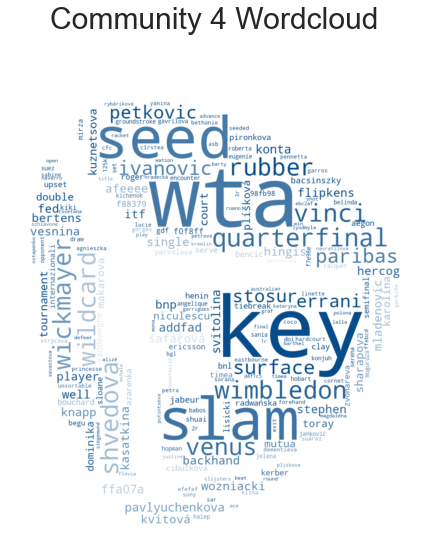

In [21]:
# (The wordcloud package looks for collocations in real texts therefore collocations = False):
gym_wordcloud =  WordCloud(collocations = False,
                              background_color = 'White',
                              stopwords = STOPWORDS,
#                               max_font_size = 100, 
#                               max_words = 500,
                              mask=gym
                             
                        ).generate(Communitie_WordCloudList[4])

# Display the generated images:
image_colors = ImageColorGenerator(gym)
plt.figure(figsize=[10,8])
plt.imshow(gym_wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.figtext(.5,1,'Community 4 Wordcloud',fontsize=30,ha='center')
plt.axis("off")
plt.show()

Community 4 show many words from the Gymnastics discipline. Amongst several professional athletes [Simone Biles](https://en.wikipedia.org/wiki/Simone_Biles) can be seen in the word cloud. She won four gold medals and one bronze medal at the Olympics 2016, which might be why she is presented many times in this Gymnastic community. 

This is cool. But what about community two and three? Why are they different communities if they both represent the dicipline "Atletics?"

### 3.2.1 Sentiment analysis in the Athletes Network
This section will look more into the athletes, and do get to know them better. We look at all the words from each athlete's Wikipedia page and analyze their sentiment. Maybe some athletes are described as especially negative or positive? 

Furthermore, we will look into each community, to see if there are special happiness levels in different communities. Are Sailors generally more happy than swimmers because they are always outside and gets a lot of sun? Or is really the opposite, that swimmers, in general, are happier - maybe because they can participate in several disciplines and therefore win more medals = happier. 

In [22]:
#Creating a list with the comunities as subgraphs

Com_temp = []

for i in range(len(set(partition.values()))):
    Com_temp.append(G_a.subgraph([k for k in list(partition.keys()) if partition[k]==i ]))

#Finding the degrees of each node on each graph, sorting them and printing top 3 as a name for the communities.
com_name = []
for Community_name in range(len(Com_temp)):
    comNo = str(Community_name)
    com_name.append(','.join([x[0] for x in sorted(Com_temp[Community_name].degree, key=lambda x: x[1], reverse=True)[:3]]))
#     print("Community "+ comNo + " is called "+','.join([x[0] for x in sorted(Com_temp[Community_name].degree, key=lambda x: x[1], reverse=True)[:3]]))


In [23]:
#Getting the LabMT wordlist from the weburl and saving it as wordlist
sent_data_url  = 'https://journals.plos.org/plosone/article/file?type=supplementary&id=info:doi/10.1371/journal.pone.0026752.s001'
wordlist = pd.read_csv(sent_data_url,sep = '\t', header =2)

Raw count TF is calculated for each page to use for the sentiment analysis: 

In [24]:
#The Term Frequency for each page is determined: 
TFpage = []
def TFListpage(df, nodetype):
    path_folder = ("./Files/")
    f = ""  
    for i in range(df.shape[0]):
         
        Node = df['WikiLink'].iloc[i]
        f  = io.open(path_folder + nodetype + Node + ".txt",'r',encoding = 'utf-8').read() #open the files
   
        # Remove all punctuation from your list of tokens, and set everything to lower case and remove stopwords
        tokens = word_tokenize(f)
        onlywords= [word for word in tokens if word.isalnum()]
        onlywords = [w.lower() for w in onlywords]

        stops = nltk.corpus.stopwords.words('english')
        words = [w for w in onlywords if w.lower() not in stops]

        FreqWord = nltk.FreqDist(words) #Calculate term frequency 
        
        TFpage.append(FreqWord) 
        
    return TFpage

#TF list for all the pages in athletes universe are saves as TFList_page
TFList_page = TFListpage(d_a, 'athletes_')

Raw count TF is calculated for community to use for sentiment analysis:

In [25]:

# Function to create the TF_lists:
def TFrealList(df, nodetype, ComNo):
    ### ALL TEXT INTO ONE LIST: ###
    # Folder with all the downloaded wikipages
    path_folder = ("./Files/")    
    
    # An empty sting
    f = ""   
    # For every wikipage in the universe add the text to the 'f' string. Such that all wikipages texts are in one string.
    for i in range(df.shape[0]):
        if df['ComNo'].iloc[i] == ComNo:
            Node = df['WikiLink'].iloc[i]                            # Open the page file
            f += io.open(path_folder + nodetype + Node + ".txt",'r',encoding = 'utf-8').read()
        
    
    ### DATA CLEANING: ###
    # Remove all punctuation from your list of tokens
    tokens = word_tokenize(f)
    onlywords= [word for word in tokens if word.isalnum()]
    
    # Set everything to lower case
    onlywords = [w.lower() for w in onlywords]
    
    #  and remove stopwords
    stops = nltk.corpus.stopwords.words('english')
    words = [w for w in onlywords if w.lower() not in stops]
    
    
    ### WORD FREQUENCY:###
    # Count the words frequency
    FreqWord = nltk.FreqDist(words) 
    
    # Return tf_w, TF and list of words:
    return FreqWord, words 

# Number of communities:
NC = d_a['ComNo'].nunique()

# Create the TFLIST and wordlist for all communities:
TFrealListCom = []
Wordsreal = []
for i in range(NC):
    TFrealListCom.append(TFrealList(d_a, 'athletes_', i)[0])
    Wordsreal.append(TFrealList(d_a, 'athletes_', i)[1])


To combine the tokens with the hapiness_average score from the wordlist a function is defined.

In [26]:
def merge(tokens):
    return pd.DataFrame(tokens).merge(wordlist, on = 'word')

#### Sentiment for each athlete 
The sentiment can now be calculated, by averaging the average sentiment for each page.

In [27]:

# Find the sentiment for each page 
Average_Sen_P = []
for page in range(len(d_a)):
    
    #The token_page is the tokens for each page. 
    token_page = pd.DataFrame(TFList_page[page].items())
    token_page = token_page.rename(columns = {0:'word',1:'freq'})
    
    #The sentiment_page is the tokens merge with the wordlist to get the happiness_average.
    sentiment_page = merge(token_page)
    # The sentiment is calculated and add as multiplied. 
    sentiment_page['multiplied'] = sentiment_page['freq']*sentiment_page['happiness_average']
    Average_Sen_P.append(sum(sentiment_page['multiplied'])/(sum(sentiment_page['freq'])))

#The sentiment calculations are stored to the dataframe. 
d_a['Sentiment'] = Average_Sen_P

Now create a historgram over all the athletes sentiment score

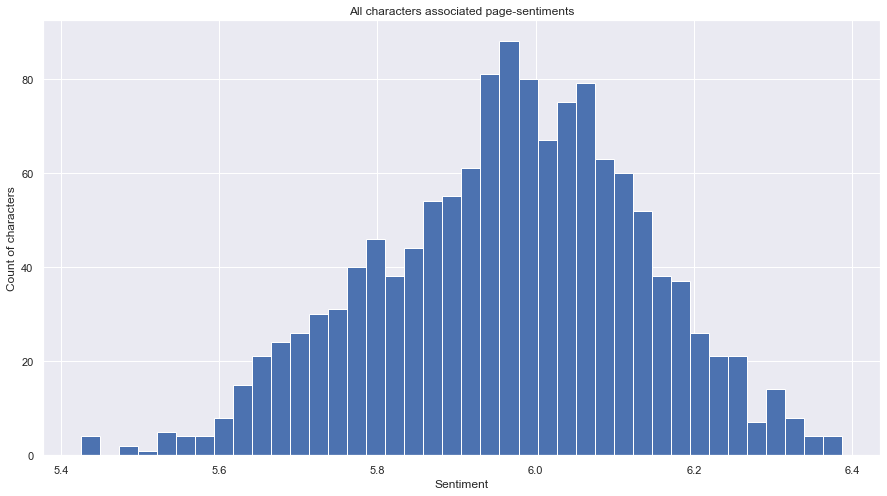

In [28]:
Min_s=int(min(d_a['Sentiment']))
Max_s = int(max(d_a['Sentiment']))

plt.figure(figsize=(15,8))
# plt.hist(d_a['Sentiment'], bins = range(Min_s, Max_s+5), color ='green')
d_a['Sentiment'].hist(bins=40);

plt.ylabel('Count of characters')
plt.xlabel('Sentiment')
plt.title('All characters associated page-sentiments')
plt.show()

Looking at the sentiment value for each wikipedia page, we can see that the athletes are all very much alike. This makes sense, since wikipedia are written neutral, and that no athlete has this big drama or feeling attached to them - most of them are just athletes, fighting to win their goal. Furthermore, most athletes have general facts as hight, age, country as information, which are all neutral words. What could be interesting to see, was wheter the number of "wins" determine their sentiment. "gold" has and happiness_average on 7.56, "silver has "6.38". Bronce is not in the sentiment wordlist.  Furthermore, winning has a better score than loosing. 


In [29]:
#The top 5 characters having the most saddest pages:
Top_Sad = d_a.sort_values(by=['Sentiment'])[:5]
Top_Sad_Ch = list(Top_Sad['name'])
Top_Sad

WikiLink  ComNo         id                name nationality  \
646       Javad_Mahjoub      2   19724524       Javad Mahjoub         IRI   
117        Adam_Cwalina      6   60265240        Adam Cwalina         POL   
397   Elisabeth_Baldauf      6  587801561   Elisabeth Baldauf         AUT   
589  David_Obernosterer      6  764731011  David Obernosterer         AUT   
13     Robert_Mateusiak      6  651788735    Robert Mateusiak         POL   

        sex      dob height weight      sport gold silver bronze  \
646    male  5/26/91   1.86    100       judo    0      0      0   
117    male  1/26/85   1.87     81  badminton    0      0      0   
397  female   8/3/90   1.75     62  badminton    0      0      0   
589    male  5/30/89   1.83     80  badminton    0      0      0   
13     male  1/13/76   1.69     65  badminton    0      0      0   

                  name2  Sentiment  
646       Javad_Mahjoub   5.425528  
117        Adam_Cwalina   5.428160  
397   Elisabeth_Baldauf   5.433588  
589  David_Obernosterer   5.440243  
13     Robert_Mateusiak   5.480607

Looking at the most sad wikipeda athletes, there nare not really any tendensy, exept noone one a medal at the Rio2016 Olympics. Furthermore many of them are badminton players (from same community), which might say something about how badmintonplayers' wikipedia pages are build. Having a quick look, many of them have a lot of tables giving overviews of different matches. 


Most happy texts: 

In [30]:
#The top 5 characters having the most happy pages:
Top_Hap = d_a.sort_values(by=['Sentiment'], ascending=False)[:5]
Top_Hap_Ch = list(Top_Hap['name'])
Top_Hap

WikiLink  ComNo         id               name nationality  \
7       Nadiya_Dusanova      7  228904239    Nadiya Dusanova         UZB   
1035    Kanako_Watanabe      1  274674975    Kanako Watanabe         JPN   
191   Svetlana_Radzivil      7   82177310  Svetlana Radzivil         UZB   
555      Madison_Wilson      1  540102843     Madison Wilson         AUS   
628    Shericka_Jackson      7  225168499   Shericka Jackson         JAM   

         sex       dob height weight      sport gold silver bronze  \
7     female  11/17/87   1.74     56  athletics    0      0      0   
1035  female  11/15/96   1.67     60   aquatics    0      0      0   
191   female   1/17/87   1.86     61  athletics    0      0      0   
555   female   5/31/94   1.79     61   aquatics    1      1      0   
628   female   7/16/94   1.73     61  athletics    0      1      1   

                  name2  Sentiment  
7       Nadiya_Dusanova   6.387151  
1035    Kanako_Watanabe   6.377992  
191   Svetlana_Radzivil   6.376445  
555      Madison_Wilson   6.369713  
628    Shericka_Jackson   6.363063

Looking at the athletes with the highest sentiment, only females are presented and they are all athletics. More medals are also won from these athletes. 

#### Sentiment for each community: 

In [31]:
sent_by_comno = d_a.groupby('ComNo')['Sentiment'].mean()
sent_by_comno = sent_by_comno.sort_values()

Lets plot the sentiment values as a barh chart.

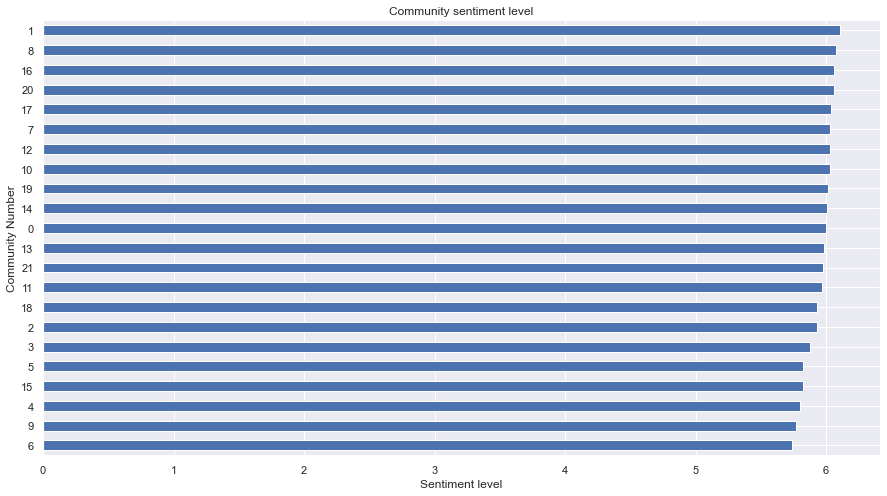

In [32]:
plt.figure(figsize=(15,8))
sent_by_comno.plot(kind= 'barh' )
plt.ylabel('Community Number')
plt.xlabel('Sentiment level')
plt.title('Community sentiment level')
plt.show()

We can see, that all communities have about the same level of sentiment.This indicates, that no matter what community you belong, the sentiment level is about the same. However, lets investigate why there is a difference between community 18 and community 3: 

Lets try to investigate this by adding together how many medals each community have won: 

We start by creating another column called #medals

In [33]:
#Have to convert gold, silver and bronze to nummeric values: 
d_a[['gold', 'silver','bronze']] = d_a[['gold', 'silver','bronze']].apply(pd.to_numeric)
#Create extra column where they are added together:
d_a['#medals']= ((d_a['gold']) + (d_a['silver']) + (d_a['bronze']) )

In [34]:
Number_of_medals_com = d_a.groupby('ComNo')['#medals'].mean()
# Number_of_medals_com = Number_of_medals_com.sort_values(ascending= True)

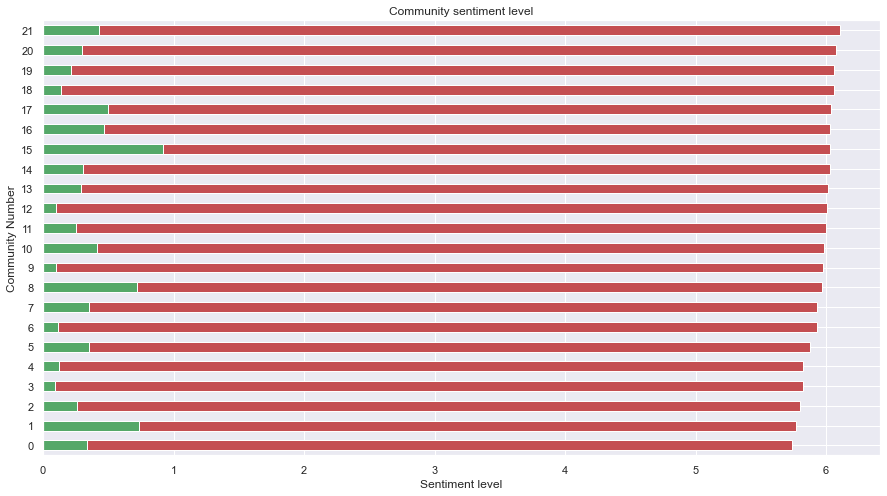

In [35]:
plt.figure(figsize=(15,8))

sent_by_comno.plot(kind= 'barh', color = 'r' )
Number_of_medals_com.plot(kind= 'barh', color = 'g', )
plt.ylabel('Community Number')
plt.xlabel('Sentiment level')
plt.title('Community sentiment level')
plt.show()

OK, with some good will, there might be a correlation here. Lets investigate further! 

In [ ]:
d_a.to_csv('d_a.csv')

## 3.3 Medalist

## 3.1 Athelets Network

In [2]:
df_a.to_csv('df_a_CSV.csv')

NameError: name 'df_a' is not defined

In [3]:
df_a = pickle.load(open('df_athletes.txt','rb'))
df_a[['gold','silver','bronze']] = df_a[['gold','silver','bronze']].apply(pd.to_numeric) 
df_a['CountMedals'] = df_a.gold + df_a.silver + df_a.bronze 
df_a

id                 name nationality     sex       dob height  \
0     435962603          Aaron Brown         CAN    male   5/27/92   1.98   
3     521041435           Aaron Cook         MDA    male    1/2/91   1.83   
6      33922579           Aaron Gate         NZL    male  11/26/90   1.81   
7     173071782          Aaron Royle         AUS    male   1/26/90    1.8   
8     266237702        Aaron Russell         USA    male    6/4/93   2.05   
...         ...                  ...         ...     ...       ...    ...   
8478  230998458      Zoya Ananchenko         KAZ  female    9/5/96   1.65   
8480  862285226       Zsombor Berecz         HUN    male   4/26/86   1.95   
8481  739315046    Zsuzsanna Jakabos         HUN  female    4/3/89   1.85   
8483  600541319  Zurabi Datunashvili         GEO    male   6/18/91   1.83   
8484  801825063  Zurabi Iakobishvili         GEO    male    2/4/92   1.71   

     weight       sport  gold  silver  bronze                name2  \
0        79   athletics     0       0       1          Aaron_Brown   
3        80   taekwondo     0       0       0           Aaron_Cook   
6        71     cycling     0       0       0           Aaron_Gate   
7        67   triathlon     0       0       0          Aaron_Royle   
8        98  volleyball     0       0       1        Aaron_Russell   
...     ...         ...   ...     ...     ...                  ...   
8478     67       canoe     0       0       0      Zoya_Ananchenko   
8480     95     sailing     0       0       0       Zsombor_Berecz   
8481     70    aquatics     0       0       0    Zsuzsanna_Jakabos   
8483     75   wrestling     0       0       0  Zurabi_Datunashvili   
8484     68   wrestling     0       0       0  Zurabi_Iakobishvili   

                     WikiLink  CountMedals  
0      Aaron_Brown_(sprinter)            1  
3      Aaron_Cook_(taekwondo)            0  
6                  Aaron_Gate            0  
7                 Aaron_Royle            0  
8               Aaron_Russell            1  
...                       ...          ...  
8478          Zoya_Ananchenko            0  
8480  Zsombor_Berecz_(sailor)            0  
8481        Zsuzsanna_Jakabos            0  
8483      Zurabi_Datunashvili            0  
8484      Zurabi_Iakobishvili            0  

[5319 rows x 14 columns]

In [4]:
G_a = pickle.load(open('G_a.txt','rb'))
print(f"The number of nodes in the network: {G_a.number_of_nodes()}")
print(f"The number of links in the network: {G_a.number_of_edges()}")

node_attr = df_a.set_index('WikiLink').to_dict('index')
nx.set_node_attributes(G_a, node_attr)

The number of nodes in the network: 5319
The number of links in the network: 7236


100%|██████████| 100/100 [00:16<00:00,  6.00it/s]


BarnesHut Approximation  took  3.13  seconds
Repulsion forces  took  13.04  seconds
Gravitational forces  took  0.05  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.22  seconds


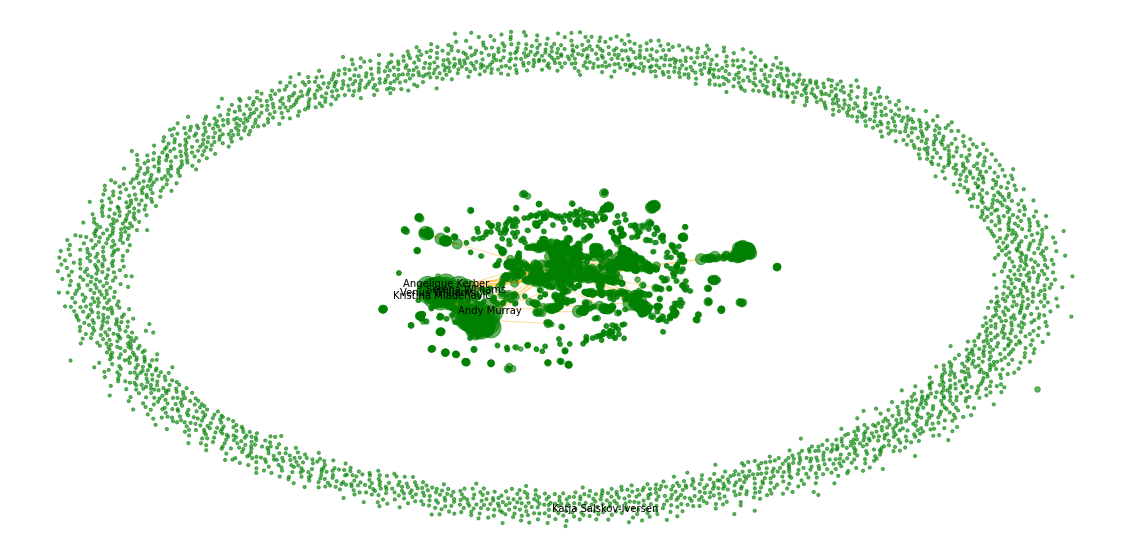

In [120]:
#Convert to an undirected graph
G_a = G_a.to_undirected()

# Node-size
G_a_Degree = [G_a.degree(i)*10+10 for i in G_a.nodes()]

# Generate the labels
labels = {}    
for node in G_a.nodes():
    if node in list(Top5_da['WikiLink']):
        labels[node] = list(Top5_da[Top5_da['WikiLink'] == node]['name'])[0] 
    elif node in list(Katja['WikiLink']):
        labels[node] = list(Katja[Katja['WikiLink'] == node]['name'])[0]
        

          
#Show the visualisation
plt.figure(figsize=(20,10))
positions = forceatlas2.forceatlas2_networkx_layout(G_a, pos=None, iterations=100)
nx.draw_networkx_nodes(G_a, positions, node_size = G_a_Degree, node_color = "green",  alpha=0.6)
nx.draw_networkx_edges(G_a, positions, edge_color="orange",alpha=0.4)
nx.draw_networkx_labels(G_a, positions, labels, font_size=10, font_color='black');
plt.axis('off')
plt.show()

### 3.1.2 Champion

In [80]:
# create a network for Marvel
nodes = (n for n, data in G_a.nodes(data=True) if (data.get("gold") != 0 or data.get("silver") != 0 or data.get("bronze") != 0))
champion = G_a.subgraph(nodes)
print(f"The number of nodes in the network: {champion.number_of_nodes()}")
print(f"The number of links in the network: {champion.number_of_edges()}")

The number of nodes in the network: 1081
The number of links in the network: 1302


100%|██████████| 100/100 [00:02<00:00, 43.64it/s]


BarnesHut Approximation  took  0.37  seconds
Repulsion forces  took  1.83  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.04  seconds


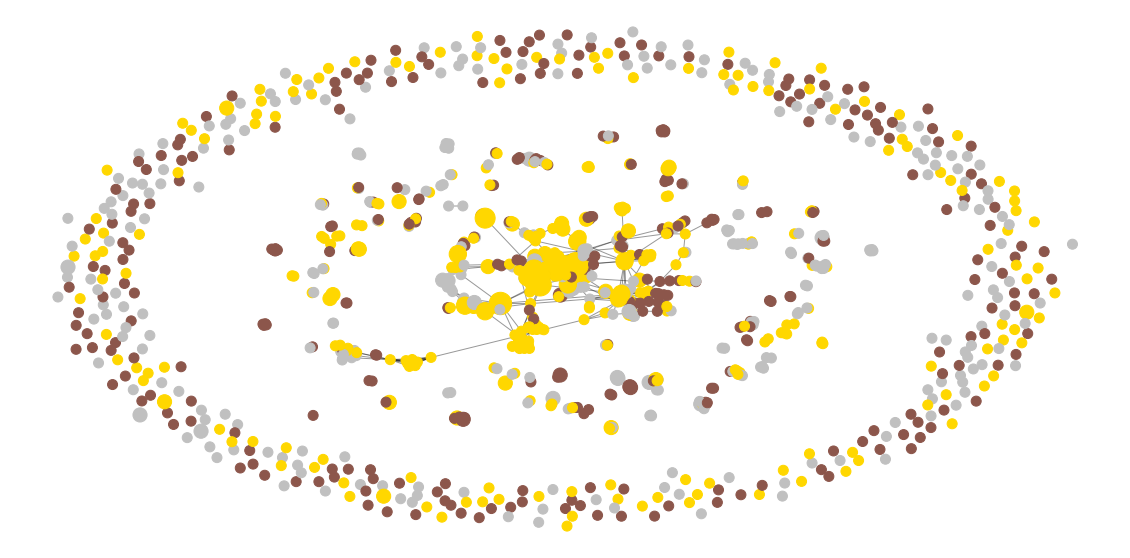

In [119]:
#Convert to an undirected graph
champion = champion.to_undirected()

# Node-size
node_sizes = [ data["CountMedals"]*100 for node, data in champion.nodes(data=True) ]  

#Node color
node_color = []
GOLD = 0 
SILVER = 0
BRONZE = 0
# for each node in the graph
for node in champion.nodes(data=True):
    # if the node has the attribute contries
    if 0 != node[1]['gold']:
        node_color.append('gold')
        GOLD += 1
    elif 0 != node[1]['silver']:
        node_color.append('silver') 
        SILVER += 1
    elif 0 != node[1]['bronze']:
        node_color.append('tab:brown')
        BRONZE += 1
    else:
        node_color.append('mistyrose')
    
#Show the visualisation
plt.figure(figsize=(20,10))
positions = forceatlas2.forceatlas2_networkx_layout(champion, pos=None, iterations=100)
nx.draw_networkx_nodes(champion, positions, node_size = node_sizes, node_color = node_color,  alpha=1)
nx.draw_networkx_edges(champion, positions, edge_color="black",alpha=0.4)
#nx.draw_networkx_labels(champion, positions, labels, font_size=10, font_color='black');
plt.axis('off')
plt.show()

In [47]:
print(GOLD)
print(SILVER)
print(BRONZE)
print(GOLD + SILVER + BRONZE)

371
362
348
1081


<hr style="border:0.5px solid gray"> </hr>

## 4. Discussion. 

> What went well?,   
> What is still missing? What could be improved?, Why?

<hr style="border:0.5px solid gray"> </hr>

## 5. Contributions.

> You should write (just briefly) which group member was the main responsible for which elements of the assignment. (I want you guys to understand every part of the assignment, but usually there is someone who took lead role on certain portions of the work. That’s what you should explain).   
>It is not OK simply to write "All group members contributed equally".